<a href="https://colab.research.google.com/github/Sunisa78-8/plpl/blob/main/midterm_bscdpdm23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     MIDTERM*
      - นางสาวlสุนิสา อุดมขันธุ์                   รหัส 643021278-8        

เตรียมข้อมูลอุตุนิยมวิทยา (https://drive.google.com/drive/folders/1k6tJcTTv2bKmFz6A5oOWi-sAeTVIQpG4?usp=sharing)

ให้เตรียมข้อมูลลักษณะอากาศของแต่ละวัน (แก้ missing, noise, ฯลฯ ) และสร้างตารางเพื่อทำการทำนาย ปริมาณน้ำฝนสำหรับจังหวัดขอนแก่นของวันถัดไป (ปริมาณน้ำฝนขอนแก่นของวันที่ D+1) จากข้อมูลลักษณะอากาศในจังหวัดต่างๆ (ขอนแก่น,หนองคาย,นครพนม,เลย,สกลนคร) ของวันปัจจุบัน (อุณหภูมิตุ้มแห้งขอนแก่นของวันที่ D,...,ความเร็วลมสกลนครของวันที่ D)


ตัวอย่างตารางที่ต้องการ (Xi มีทั้งหมด 5จังหวัด * 8ลักษณะอากาศ = 40 columns และ Y อีก 1 columns)

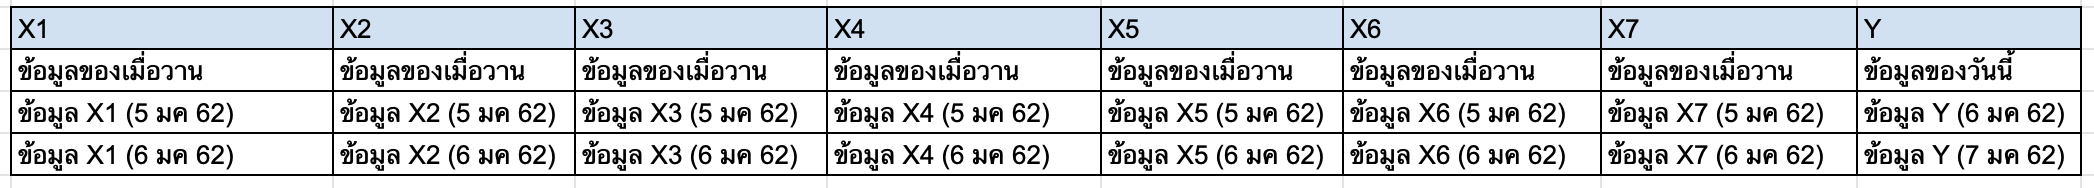

(Met) Meteorology = อุตุนิยมวิทยา

(Atp) Atmospheric pressure = ความกดอากาศ - %

(ReH) Relative Humidity = ความชื้นสัมพัทธ์ - %

(Wind) Wind Speed = ความเร็วลม  - นอต

(Cloud) Cloud Amount = จำนวนเมฆ  - 10ส่วน

(Rain) Rainfall = ปริมาณฝน - ml.

(Dpt) Dew point temperature =  อุณหภูมิจุดน้ำค้าง  - c

(LT) lowest temperature = อุณหภูมิต่ำสุด - c

(Dbt) Dry-bulb temperature= อุณหภูมิตุ้มแห้ง   - c

KK = ขอนแก่น

NKP = นครพนม

L = เลย

SKN = สกลนคร

NK = หนองคาย

In [4754]:
import pandas as pd
import numpy as np
import os

#เชื่อม Drive

In [4755]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1.ความกดอากาศ Atmospheric pressure  (Atp)

In [4756]:
###ชุดข้อมูลทั้ง 5 จังหวัดของหมวดความกดอากาศ
Atp_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
Atp_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
Atp_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
Atp_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
Atp_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความกด(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)


In [4757]:
### test
Atp_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


##-----*แก้ชื่อจังหวัดข้อมูล

-ข้อมูลแต่ละจังหวัดมันเป็นหนองคาย ---> แก้เป็นจังหวัดตามชุดข้อมูล

In [4758]:
  Atp_KK=Atp_KK.replace('352201-หนองคาย จ.หนองคาย','381201-ขอนแก่น จ.ขอนแก่น')
  Atp_NKP=Atp_NKP.replace('352201-หนองคาย จ.หนองคาย','357201-นครพนม จ.นครพนม')
  Atp_SKN= Atp_SKN.replace('352201-หนองคาย จ.หนองคาย','356201-สกลนคร จ.สกลนคร')
  Atp_L=Atp_L.replace('352201-หนองคาย จ.หนองคาย','353301-เลย สกษ. จ.เลย')

In [4759]:
Atp_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


**----- เปลี่ยนชื่อ column1 -----**

In [4760]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}


In [4761]:
###เปลี่ยนชื่อ column ทุกจังหวัด
Atp_KK=Atp_KK.rename(columns=p)
Atp_NKP=Atp_NKP.rename(columns=p)
Atp_SKN=Atp_SKN.rename(columns=p)
Atp_NK =Atp_NK .rename(columns=p)
Atp_L =Atp_L.rename(columns=p)

In [4762]:
### test
Atp_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.67,1011.3,1011.52,1010.350645
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.13,1010.47,-,1011.717000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.98,1015.53,1016.4,1016.470000
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.69,1012.34,1014.52,1012.484516
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.53,1010.47,-,1009.749667
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.71,1008.7,1011.83,1010.386452
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.04,1009.54,-,1010.464333
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.9,1011.64,1014.86,1011.622581
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.31,1014.99,1015.58,1013.629677
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,-,-,-,1011.207500


##ขอนแก่น (KK)

###เช็ค Missing & แก้ Missing ---> Mean

In [4763]:
Atp_KK = Atp_KK.replace('-',np.NaN)

In [4764]:
Atp_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4765]:
#มีค่าผิดปกติ 3 ค่า ใน 29,30,31 ก็เลยแทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Atp_KK['ที่'])):Atp_KK.iloc[i,:]=Atp_KK.iloc[i,:].fillna(Atp_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Atp_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [4766]:
Atp_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1005.47,1006.65,1007.49,1008.28,1009.88,1011.36,1011.17,...,1010.76,1010.23,1011.34,1011.84,1011.89,1012.29,1011.670000,1011.300000,1011.520000,1010.350645
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,1011.79,1010.83,1010.74,1010.71,1010.09,1009.24,1008.03,...,1014.07,1015.40,1013.95,1012.35,1011.31,1009.59,1010.130000,1010.470000,1011.717000,1011.717000
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,1011.43,1012.57,1012.28,1012.97,1013.09,1012.03,1012.05,...,1012.88,1015.78,1018.56,1018.65,1016.88,1016.05,1014.980000,1015.530000,1016.400000,1016.470000
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,1015.67,1014.11,1012.91,1014.06,1015.51,1015.88,1017.72,...,1010.91,1011.27,1011.65,1012.56,1010.76,1010.26,1010.690000,1012.340000,1014.520000,1012.484516
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,1013.26,1012.92,1013.61,1013.18,1011.26,1008.80,1008.16,...,1005.75,1005.46,1004.80,1005.08,1006.57,1005.96,1006.530000,1010.470000,1009.749667,1009.749667
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,1011.50,1011.11,1008.60,1007.07,1008.17,1010.06,1010.11,...,1010.93,1010.20,1009.78,1009.08,1008.67,1008.41,1008.710000,1008.700000,1011.830000,1010.386452
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,1012.67,1011.17,1010.47,1010.24,1010.43,1010.90,1009.76,...,1008.60,1010.51,1011.46,1010.77,1010.16,1010.18,1010.040000,1009.540000,1010.464333,1010.464333
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,1009.80,1010.17,1010.74,1010.72,1010.61,1012.15,1011.02,...,1014.53,1016.29,1013.54,1011.60,1010.58,1009.61,1009.900000,1011.640000,1014.860000,1011.622581
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,1014.58,1013.30,1013.73,1012.89,1011.43,1011.80,1012.20,...,1013.16,1012.54,1012.09,1012.41,1013.80,1016.45,1015.310000,1014.990000,1015.580000,1013.629677
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,1015.19,1013.97,1013.89,1013.91,1013.43,1011.11,1008.35,...,1015.38,1013.40,1011.79,1010.17,1007.95,1006.82,1011.207500,1011.207500,1011.207500,1011.207500


###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4767]:
#เพิ่มคอลัมน์ปี
Atp_KK['Year'] = Atp_KK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Atp_KK['Month'] = Atp_KK['เดือน/ปี'].dt.month
#เพิ่ม คอลัมน์ จังหวัด
Atp_KK['จังหวัด']='ขอนเเก่น'
#drop คอลัมน์ที่ไม่ใช้
Atp_KK = Atp_KK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Atp_KK = Atp_KK.set_index(["Year",'Month',"จังหวัด"]).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'Day'})
#กำหนด PK ในตาราง
Atp_KK['id']=["KK{}".format(i) for i in range(len(Atp_KK['Month']))]

In [4768]:
Atp_KK

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id
0,2011,10,ขอนเเก่น,1,1005.470000,KK0
1,2011,10,ขอนเเก่น,2,1006.650000,KK1
2,2011,10,ขอนเเก่น,3,1007.490000,KK2
3,2011,10,ขอนเเก่น,4,1008.280000,KK3
4,2011,10,ขอนเเก่น,5,1009.880000,KK4
...,...,...,...,...,...,...
1700,2022,2,ขอนเเก่น,27,1014.370000,KK1700
1701,2022,2,ขอนเเก่น,28,1013.040000,KK1701
1702,2022,2,ขอนเเก่น,29,1013.370000,KK1702
1703,2022,2,ขอนเเก่น,30,1013.980000,KK1703



##นครพนม (NKP)



###เช็ค Missing & แก้ Missing ---> Mean

In [4769]:
Atp_NKP = Atp_NKP.replace('-',np.NaN)
Atp_NKP.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4770]:
for i in range(len(Atp_NKP['ที่'])):Atp_NKP.iloc[i,:]=Atp_NKP.iloc[i,:].fillna(Atp_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Atp_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4771]:


#เพิ่มคอลัมน์ปี
Atp_NKP['Year'] = Atp_NKP['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Atp_NKP['Month'] = Atp_NKP['เดือน/ปี'].dt.month
#เพิ่ม คอลัมน์ จังหวัด
Atp_NKP['จังหวัด']='นครพนม'
#drop คอลัมน์ที่ไม่ใช้
Atp_NKP = Atp_NKP.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Atp_NKP = Atp_NKP.set_index(["Year",'Month',"จังหวัด"]).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'Day'})
#กำหนด PK ในตาราง
Atp_NKP['id']=["NKP{}".format(i) for i in range(len(Atp_NKP['Month']))]



In [4772]:
Atp_NKP

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id
0,2011,10,นครพนม,1,1006.300,NKP0
1,2011,10,นครพนม,2,1007.380,NKP1
2,2011,10,นครพนม,3,1008.070,NKP2
3,2011,10,นครพนม,4,1008.440,NKP3
4,2011,10,นครพนม,5,1010.510,NKP4
...,...,...,...,...,...,...
1700,2022,2,นครพนม,27,1016.430,NKP1700
1701,2022,2,นครพนม,28,1013.530,NKP1701
1702,2022,2,นครพนม,29,1013.370,NKP1702
1703,2022,2,นครพนม,30,1013.980,NKP1703


##เลย (L)




###เช็ค Missing & แก้ Missing ---> Mean

In [4773]:
Atp_L = Atp_L.replace('-',np.NaN)
Atp_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4774]:
for i in range(len(Atp_L['ที่'])):Atp_L.iloc[i,:]=Atp_L.iloc[i,:].fillna(Atp_L.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Atp_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4775]:
#เพิ่มคอลัมน์ปี
Atp_L['Year'] = Atp_L['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Atp_L['Month'] = Atp_L['เดือน/ปี'].dt.month
#เพิ่ม คอลัมน์ จังหวัด
Atp_L['จังหวัด']='เลย'
#drop คอลัมน์ที่ไม่ใช้
Atp_L = Atp_L.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Atp_L = Atp_L.set_index(["Year",'Month',"จังหวัด"]).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'Day'})
#กำหนด PK ในตาราง
Atp_L['id']=["L{}".format(i) for i in range(len(Atp_L['Month']))]

In [4776]:
Atp_L

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id
0,2011,10,เลย,1,1005.120000,L0
1,2011,10,เลย,2,1006.510000,L1
2,2011,10,เลย,3,1007.810000,L2
3,2011,10,เลย,4,1008.150000,L3
4,2011,10,เลย,5,1009.210000,L4
...,...,...,...,...,...,...
1700,2022,2,เลย,27,1014.970000,L1700
1701,2022,2,เลย,28,1012.880000,L1701
1702,2022,2,เลย,29,1012.366071,L1702
1703,2022,2,เลย,30,1012.366071,L1703


##สกลนคร (SKN)



###เช็ค Missing & แก้ Missing ---> Mean

In [4777]:
Atp_SKN = Atp_SKN.replace('-',np.NaN)
Atp_SKN.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4778]:
##แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Atp_SKN['ที่'])):Atp_SKN.iloc[i,:]=Atp_SKN.iloc[i,:].fillna(Atp_SKN.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Atp_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4779]:
#เพิ่มคอลัมน์ปี
Atp_SKN['Year'] = Atp_SKN['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Atp_SKN['Month'] = Atp_SKN['เดือน/ปี'].dt.month
#เพิ่ม คอลัมน์ จังหวัด
Atp_SKN['จังหวัด']='สกลนคร'
#drop คอลัมน์ที่ไม่ใช้
Atp_SKN = Atp_SKN.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Atp_SKN = Atp_SKN.set_index(["Year",'Month',"จังหวัด"]).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'Day'})
#กำหนด PK ในตาราง
Atp_SKN['id']=["SKN{}".format(i) for i in range(len(Atp_SKN['Month']))]

In [4780]:
Atp_SKN

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id
0,2011,10,สกลนคร,1,1005.840000,SKN0
1,2011,10,สกลนคร,2,1007.160000,SKN1
2,2011,10,สกลนคร,3,1007.870000,SKN2
3,2011,10,สกลนคร,4,1008.560000,SKN3
4,2011,10,สกลนคร,5,1010.550000,SKN4
...,...,...,...,...,...,...
1700,2022,2,สกลนคร,27,1014.950000,SKN1700
1701,2022,2,สกลนคร,28,1012.890000,SKN1701
1702,2022,2,สกลนคร,29,1013.370000,SKN1702
1703,2022,2,สกลนคร,30,1013.980000,SKN1703


##หนองคาย NK

###เช็ค Missing & แก้ Missing ---> Mean

In [4781]:
Atp_NK = Atp_NK.replace('-',np.NaN)
Atp_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4782]:
##แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Atp_NK['ที่'])):Atp_NK.iloc[i,:]=Atp_NK.iloc[i,:].fillna(Atp_NK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Atp_NK.isnull().any()

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4783]:
#เพิ่มคอลัมน์ปี
Atp_NK['Year'] = Atp_NK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Atp_NK['Month'] = Atp_NK['เดือน/ปี'].dt.month
#เพิ่ม คอลัมน์ จังหวัด
Atp_NK['จังหวัด']='หนองคาย'
#drop คอลัมน์ที่ไม่ใช้
Atp_NK = Atp_NK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Atp_NK = Atp_NK.set_index(["Year",'Month',"จังหวัด"]).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความกดอากาศ(%)','level_3':'Day'})
#กำหนด PK ในตาราง
Atp_NK['id']=["NK{}".format(i) for i in range(len(Atp_NK['Month']))]


In [4784]:
Atp_NK

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id
0,2011,10,หนองคาย,1,1005.340000,NK0
1,2011,10,หนองคาย,2,1006.670000,NK1
2,2011,10,หนองคาย,3,1007.390000,NK2
3,2011,10,หนองคาย,4,1008.110000,NK3
4,2011,10,หนองคาย,5,1009.690000,NK4
...,...,...,...,...,...,...
1700,2022,2,หนองคาย,27,1015.310000,NK1700
1701,2022,2,หนองคาย,28,1013.060000,NK1701
1702,2022,2,หนองคาย,29,1012.519286,NK1702
1703,2022,2,หนองคาย,30,1012.519286,NK1703


#2.ความชื้นสัมพัทธ์ Relative Humidity   (ReH)

In [4785]:
### ชุดข้อมูล
ReH_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.ขอนแก่น.xlsx",header=4)
ReH_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.นครพนม.xlsx",header=4)
ReH_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.สกลนคร.xlsx",header=4)
ReH_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.หนองคาย.xlsx",header=4)
ReH_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความชื้นสัมพัทธ์(เปอร์เซ็นต์)/จ.เลย.xlsx",header=4)


In [4786]:
ReH_NK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,89,91,78,75,90,88,87,...,76,73,68,71,70,71,70,66,68,76
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,68,66,66,67,68,69,68,...,60,64,65,67,68,69,71,69,-,68
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,67,62,66,66,65,68,71,...,65,56,61,58,67,71,70,67,68,65
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,67,70,68,65,73,68,66,...,81,71,71,68,71,69,65,68,73,70
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,68,71,91,79,78,71,67,...,63,63,61,62,69,76,69,-,-,69
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,69,70,74,81,84,79,68,...,69,70,70,70,69,67,69,72,60,72
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,63,68,69,70,67,69,68,...,70,74,79,77,76,72,84,76,-,71
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,76,74,71,73,75,66,73,...,61,62,63,68,69,71,69,63,59,69
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,67,68,66,68,69,68,67,...,67,64,66,67,86,83,76,68,88,68
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,81,77,74,69,67,65,57,...,53,57,61,59,60,65,-,-,-,64


**----- เปลี่ยนชื่อ column2 -----**

In [4787]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
ReH_KK=ReH_KK.rename(columns=p)
ReH_NKP=ReH_NKP.rename(columns=p)
ReH_SKN=ReH_SKN.rename(columns=p)
ReH_NK =ReH_NK .rename(columns=p)
ReH_L =ReH_L.rename(columns=p)

In [4788]:
ReH_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,83,92,86,80,86,86,83,...,73,72,73,69,69,75,71,71,68,79
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,71,65,68,65,65,68,69,...,65,66,65,67,68,67,67,65,-,68
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,66,61,61,62,61,60,69,...,63,62,60,60,62,65,66,63,64,63
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,65,66,69,63,64,68,65,...,80,74,75,71,75,69,70,67,68,69
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,71,72,71,72,70,68,61,...,58,53,48,57,71,73,68,-,-,65
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,73,73,72,81,83,73,70,...,65,68,69,69,62,64,69,74,68,72
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,64,67,67,66,65,65,67,...,63,75,82,75,73,73,75,74,-,68
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,68,66,69,71,69,63,67,...,59,56,60,59,58,61,57,55,54,62
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,62,58,59,60,62,61,62,...,59,59,59,67,71,91,78,71,72,63
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,69,66,62,58,59,53,50,...,50,52,56,53,51,54,-,-,-,55


##ขอนแก่น (KK)


###เช็ค Missing & แก้ Missing ---> Mean


In [4789]:

ReH_KK= ReH_KK.replace('-',np.NaN)
ReH_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4790]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(ReH_KK['ที่'])):ReH_KK.iloc[i,:]=ReH_KK.iloc[i,:].fillna(ReH_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
ReH_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4791]:
#เพิ่มคอลัมน์ปี
ReH_KK['Year'] = ReH_KK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
ReH_KK['Month'] = ReH_KK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
ReH_KK = ReH_KK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
ReH_KK = ReH_KK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์','level_2':'Day'})
#กำหนด PK ในตาราง
ReH_KK['id']=["KK{}".format(i) for i in range(len(ReH_KK['Month']))]

In [4792]:
ReH_KK

,Year,Month,Day,ความชื้นสัมพัทธ์,id
0,2011,10,1,83.0,KK0
1,2011,10,2,92.0,KK1
2,2011,10,3,86.0,KK2
3,2011,10,4,80.0,KK3
4,2011,10,5,86.0,KK4
...,...,...,...,...,...
1700,2022,2,27,58.0,KK1700
1701,2022,2,28,62.0,KK1701
1702,2022,2,29,69.0,KK1702
1703,2022,2,30,69.0,KK1703


##นครพนม (NKP)


###เช็ค Missing & แก้ Missing ---> Mean

In [4793]:

ReH_NKP = ReH_NKP.replace('-',np.NaN)
ReH_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4794]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(ReH_NKP['ที่'])):ReH_NKP.iloc[i,:]=ReH_NKP.iloc[i,:].fillna(ReH_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
ReH_NKP.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4795]:

#เพิ่มคอลัมน์ปี
ReH_NKP['Year'] = ReH_NKP['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
ReH_NKP['Month'] = ReH_NKP['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
ReH_NKP = ReH_NKP.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
ReH_NKP = ReH_NKP.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์','level_2':'Day'})
#กำหนด PK ในตาราง
ReH_NKP['id']=["NKP{}".format(i) for i in range(len(ReH_NKP['Month']))]

In [4796]:
ReH_NKP

,Year,Month,Day,ความชื้นสัมพัทธ์,id
0,2011,10,1,95.0,NKP0
1,2011,10,2,84.0,NKP1
2,2011,10,3,74.0,NKP2
3,2011,10,4,72.0,NKP3
4,2011,10,5,87.0,NKP4
...,...,...,...,...,...
1700,2022,2,27,52.0,NKP1700
1701,2022,2,28,60.0,NKP1701
1702,2022,2,29,64.0,NKP1702
1703,2022,2,30,64.0,NKP1703


##เลย (L)


###เช็ค Missing & แก้ Missing ---> Mean

In [4797]:
ReH_L = ReH_L.replace('-',np.NaN)
ReH_L.isnull().any()



ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4798]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(ReH_L['ที่'])):ReH_L.iloc[i,:]=ReH_L.iloc[i,:].fillna(ReH_L.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
ReH_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4799]:
#เพิ่มคอลัมน์ปี
ReH_L['Year'] = ReH_L['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
ReH_L['Month'] = ReH_L['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
ReH_L = ReH_L.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
ReH_L = ReH_L.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์','level_2':'Day'})
#กำหนด PK ในตาราง
ReH_L['id']=["L{}".format(i) for i in range(len(ReH_L['Month']))]


In [4800]:
ReH_L

,Year,Month,Day,ความชื้นสัมพัทธ์,id
0,2011,10,1,90.0,L0
1,2011,10,2,95.0,L1
2,2011,10,3,92.0,L2
3,2011,10,4,89.0,L3
4,2011,10,5,86.0,L4
...,...,...,...,...,...
1700,2022,2,27,74.0,L1700
1701,2022,2,28,72.0,L1701
1702,2022,2,29,80.0,L1702
1703,2022,2,30,80.0,L1703


##สกลนคร (SKN)

###เช็ค Missing & แก้ Missing ---> Mean


In [4801]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(ReH_SKN['ที่'])):ReH_SKN.iloc[i,:]=ReH_SKN.iloc[i,:].fillna(ReH_SKN.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
ReH_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4802]:
#เพิ่มคอลัมน์ปี
ReH_SKN['Year'] = ReH_SKN['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
ReH_SKN['Month'] = ReH_SKN['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
ReH_SKN = ReH_SKN.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
ReH_SKN = ReH_SKN.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์','level_2':'Day'})
#กำหนด PK ในตาราง
ReH_SKN['id']=["SKN{}".format(i) for i in range(len(ReH_SKN['Month']))]

In [4803]:
ReH_SKN

,Year,Month,Day,ความชื้นสัมพัทธ์,id
0,2011,10,1,87,SKN0
1,2011,10,2,88,SKN1
2,2011,10,3,77,SKN2
3,2011,10,4,75,SKN3
4,2011,10,5,87,SKN4
...,...,...,...,...,...
1700,2022,2,27,65,SKN1700
1701,2022,2,28,68,SKN1701
1702,2022,2,29,-,SKN1702
1703,2022,2,30,-,SKN1703



##หนองคาย NK

###เช็ค Missing & แก้ Missing ---> Mean


In [4804]:
ReH_NK = ReH_NK.replace('-',np.NaN)
ReH_NK.isnull().any()



ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4805]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(ReH_NK['ที่'])):ReH_NK.iloc[i,:]=ReH_NK.iloc[i,:].fillna(ReH_NK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
ReH_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4806]:
#เพิ่มคอลัมน์ปี
ReH_NK['Year'] = ReH_NK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
ReH_NK['Month'] = ReH_NK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
ReH_NK = ReH_NK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
ReH_NK = ReH_NK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความชื้นสัมพัทธ์','level_2':'Day'})
#กำหนด PK ในตาราง
ReH_NK['id']=["NK{}".format(i) for i in range(len(ReH_NK['Month']))]

In [4807]:
ReH_NK

,Year,Month,Day,ความชื้นสัมพัทธ์,id
0,2011,10,1,89.0,NK0
1,2011,10,2,91.0,NK1
2,2011,10,3,78.0,NK2
3,2011,10,4,75.0,NK3
4,2011,10,5,90.0,NK4
...,...,...,...,...,...
1700,2022,2,27,62.0,NK1700
1701,2022,2,28,65.0,NK1701
1702,2022,2,29,71.0,NK1702
1703,2022,2,30,71.0,NK1703


#3.ความเร็วลม  Wind Speed (Wind)

In [4808]:
### ชุดข้อมูล
Wind_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความเร็วลม(นอต)/จ.ขอนแก่น.xlsx",header=4)
Wind_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความเร็วลม(นอต)/จ.นครพนม.xlsx",header=4)
Wind_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความเร็วลม(นอต)/จ.สกลนคร.xlsx",header=4)
Wind_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความเร็วลม(นอต)/จ.หนองคาย.xlsx",header=4)
Wind_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ความเร็วลม(นอต)/จ.เลย.xlsx",header=4)


In [4809]:
Wind_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,2,2,1,2,2,5,7,...,6,4,2,4,5,2,2,3,5,3.225806
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,3,2,0,2,2,3,2,...,2,3,3,1,3,3,3,3,-,2.633333
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,2,3,3,3,4,4,4,...,5,5,5,5,5,4,3,5,6,3.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333



##-----*แก้ชื่อจังหวัดข้อมูล

-ข้อมูลแต่ละจังหวัดมันเป็นเลย ---> แก้เป็นจังหวัดตามชุดข้อมูล

In [4810]:
Wind_KK=Wind_KK.replace('353301-เลย สกษ. จ.เลย','381201-ขอนแก่น จ.ขอนแก่น')
Wind_NKP=Wind_NKP.replace('353301-เลย สกษ. จ.เลย','357201-นครพนม จ.นครพนม')
Wind_SKN=Wind_SKN.replace('353301-เลย สกษ. จ.เลย','356201-สกลนคร จ.สกลนคร')
Wind_NK=Wind_NK.replace('353301-เลย สกษ. จ.เลย','352201-หนองคาย จ.หนองคาย')

In [4811]:
Wind_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,2,2,1,2,2,5,7,...,6,4,2,4,5,2,2,3,5,3.225806
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,3,2,0,2,2,3,2,...,2,3,3,1,3,3,3,3,-,2.633333
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,2,3,3,3,4,4,4,...,5,5,5,5,5,4,3,5,6,3.645161
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


**----- เปลี่ยนชื่อ column3 -----**

In [4812]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
Wind_KK=Wind_KK.rename(columns=p)
Wind_NKP=Wind_NKP.rename(columns=p)
Wind_SKN=Wind_SKN.rename(columns=p)
Wind_NK =Wind_NK .rename(columns=p)
Wind_L =Wind_L.rename(columns=p)

In [4813]:
Wind_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,3,2,3,2,2,3,4,...,2,3,5,5,5,4,6,4,5,3.354839
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,4,5,3,3,5,2,3,...,7,6,5,5,3,1,3,3,-,3.466667
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,3,4,4,4,4,4,4,...,5,6,7,6,5,4,4,6,5,4.806452
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,4,2,1,4,4,2,4,...,3,3,4,2,2,1,3,4,4,3.129032
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,2,2,3,2,3,1,2,...,1,2,3,2,4,3,3,3,-,2.566667
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,2,2,1,2,2,5,7,...,6,4,2,4,5,2,2,3,5,3.225806
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,3,2,0,2,2,3,2,...,2,3,3,1,3,3,3,3,-,2.633333
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,2,3,3,3,4,4,4,...,5,5,5,5,5,4,3,5,6,3.645161
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


##ขอนแก่น (KK)


###เช็ค Missing & แก้ Missing ---> Mean




In [4814]:

Wind_KK = Wind_KK.replace('-',np.NaN)
Wind_KK.isnull().any()
##ค่า missing เยอะ

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3             True
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4815]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Wind_KK['ที่'])):Wind_KK.iloc[i,:]=Wind_KK.iloc[i,:].fillna(Wind_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Wind_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4816]:
#เพิ่มคอลัมน์ปี
Wind_KK['Year'] = Wind_KK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Wind_KK['Month'] = Wind_KK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Wind_KK = Wind_KK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Wind_KK = Wind_KK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม','level_2':'Day'})
#กำหนด PK ในตาราง
Wind_KK['id']=["KK{}".format(i) for i in range(len(Wind_KK['Month']))]

In [4817]:
Wind_KK

,Year,Month,Day,ความเร็วลม,id
0,2011,10,1,3.000000,KK0
1,2011,10,2,2.000000,KK1
2,2011,10,3,3.000000,KK2
3,2011,10,4,2.000000,KK3
4,2011,10,5,2.000000,KK4
...,...,...,...,...,...
1700,2022,2,27,2.000000,KK1700
1701,2022,2,28,2.000000,KK1701
1702,2022,2,29,2.571429,KK1702
1703,2022,2,30,2.571429,KK1703


##นครพนม (NKP)


###เช็ค Missing & แก้ Missing ---> Mean


In [4818]:

Wind_NKP = Wind_NKP.replace('-',np.NaN)
Wind_NKP.isnull().any()
##ค่า missing เยอะ





ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4             True
5             True
6            False
7             True
8             True
9            False
10            True
11            True
12            True
13           False
14           False
15            True
16            True
17           False
18            True
19           False
20            True
21            True
22            True
23           False
24            True
25            True
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4819]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Wind_NKP['ที่'])):Wind_NKP.iloc[i,:]=Wind_NKP.iloc[i,:].fillna(Wind_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Wind_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4820]:
#เพิ่มคอลัมน์ปี
Wind_NKP['Year'] = Wind_NKP['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Wind_NKP['Month'] = Wind_NKP['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Wind_NKP = Wind_NKP.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Wind_NKP = Wind_NKP.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม','level_2':'Day'})
#กำหนด PK ในตาราง
Wind_NKP['id']=["NKP{}".format(i) for i in range(len(Wind_NKP['Month']))]

In [4821]:
Wind_NKP

,Year,Month,Day,ความเร็วลม,id
0,2011,10,1,1.000000,NKP0
1,2011,10,2,1.000000,NKP1
2,2011,10,3,2.000000,NKP2
3,2011,10,4,2.000000,NKP3
4,2011,10,5,1.000000,NKP4
...,...,...,...,...,...
1700,2022,2,27,2.000000,NKP1700
1701,2022,2,28,1.000000,NKP1701
1702,2022,2,29,2.142857,NKP1702
1703,2022,2,30,2.142857,NKP1703


##เลย (L)


###เช็ค Missing & แก้ Missing ---> Mean


In [4822]:

Wind_L = Wind_L.replace('-',np.NaN)
Wind_L.isnull().any()
##ค่า missing เยอะ


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5             True
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16            True
17           False
18           False
19            True
20           False
21           False
22           False
23           False
24            True
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4823]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Wind_L['ที่'])):Wind_L.iloc[i,:]=Wind_L.iloc[i,:].fillna(Wind_L.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Wind_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4824]:

#เพิ่มคอลัมน์ปี
Wind_L['Year'] = Wind_L['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Wind_L['Month'] = Wind_L['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Wind_L = Wind_L.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Wind_L = Wind_L.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม','level_2':'Day'})
#กำหนด PK ในตาราง
Wind_L['id']=["L{}".format(i) for i in range(len(Wind_L['Month']))]

In [4825]:
Wind_L

,Year,Month,Day,ความเร็วลม,id
0,2011,10,1,2.000000,L0
1,2011,10,2,2.000000,L1
2,2011,10,3,3.000000,L2
3,2011,10,4,2.000000,L3
4,2011,10,5,3.000000,L4
...,...,...,...,...,...
1700,2022,2,27,1.000000,L1700
1701,2022,2,28,1.000000,L1701
1702,2022,2,29,1.678571,L1702
1703,2022,2,30,1.678571,L1703


##สกลนคร (SKN)


###เช็ค Missing & แก้ Missing ---> Mean

In [4826]:
Wind_SKN = Wind_SKN.replace('-',np.NaN)
Wind_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4             True
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20            True
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4827]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Wind_SKN['ที่'])):Wind_SKN.iloc[i,:]=Wind_SKN.iloc[i,:].fillna(Wind_SKN.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Wind_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4828]:
#เพิ่มคอลัมน์ปี
Wind_SKN['Year'] = Wind_SKN['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Wind_SKN['Month'] = Wind_SKN['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Wind_SKN = Wind_SKN.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Wind_SKN = Wind_SKN.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม','level_2':'Day'})
#กำหนด PK ในตาราง
Wind_SKN['id']=["SKN{}".format(i) for i in range(len(Wind_SKN['Month']))]

In [4829]:
Wind_SKN

,Year,Month,Day,ความเร็วลม,id
0,2011,10,1,1.000000,SKN0
1,2011,10,2,1.000000,SKN1
2,2011,10,3,2.000000,SKN2
3,2011,10,4,2.000000,SKN3
4,2011,10,5,1.000000,SKN4
...,...,...,...,...,...
1700,2022,2,27,3.000000,SKN1700
1701,2022,2,28,2.000000,SKN1701
1702,2022,2,29,3.035714,SKN1702
1703,2022,2,30,3.035714,SKN1703


##หนองคาย (NK)

###เช็ค Missing & แก้ Missing ---> Mean

In [4830]:
Wind_NK = Wind_NK.replace('-',np.NaN)
Wind_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4             True
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4831]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Wind_NK['ที่'])):Wind_NK.iloc[i,:]=Wind_NK.iloc[i,:].fillna(Wind_NK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Wind_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น


In [4832]:

#เพิ่มคอลัมน์ปี
Wind_NK['Year'] = Wind_NK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Wind_NK['Month'] = Wind_NK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Wind_NK = Wind_NK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Wind_NK = Wind_NK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ความเร็วลม','level_2':'Day'})
#กำหนด PK ในตาราง
Wind_NK['id']=["NK{}".format(i) for i in range(len(Wind_NK['Month']))]

#4.จำนวนเมฆ Cloud Amount (Cloud)

In [4833]:
### ชุดข้อมูล
Cloud_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.ขอนแก่น.xlsx",header=4)
Cloud_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.นครพนม.xlsx",header=4)
Cloud_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.สกลนคร.xlsx",header=4)
Cloud_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.หนองคาย.xlsx",header=4)
Cloud_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/จำนวนเมฆ(10ส่วน)/จ.เลย.xlsx",header=4)

In [4834]:
Cloud_NK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353301-เลย สกษ. จ.เลย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,353301-เลย สกษ. จ.เลย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,353301-เลย สกษ. จ.เลย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,353301-เลย สกษ. จ.เลย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,353301-เลย สกษ. จ.เลย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571
5,3,353301-เลย สกษ. จ.เลย,2012-10-01,1,1,5,8,8,7,2,...,4,1,2,4,1,3,4,3,4,2.806452
6,4,353301-เลย สกษ. จ.เลย,2012-11-01,2,1,0,6,3,2,2,...,2,8,7,6,6,8,8,4,-,3.900000
7,5,353301-เลย สกษ. จ.เลย,2012-12-01,4,3,7,5,3,3,4,...,4,4,7,9,2,1,0,3,4,2.645161
8,6,353301-เลย สกษ. จ.เลย,2013-01-01,4,2,0,1,1,3,1,...,1,4,3,7,10,10,5,4,10,3.448276
9,7,353301-เลย สกษ. จ.เลย,2013-02-01,4,8,8,5,0,0,0,...,1,1,2,3,1,1,NaN,NaN,-,2.375000



##-----*แก้ชื่อจังหวัดข้อมูล

-ข้อมูลแต่ละจังหวัดมันเป็นเลย ---> แก้เป็นจังหวัดตามชุดข้อมูล

In [4835]:
Cloud_KK=Cloud_KK.replace('353301-เลย สกษ. จ.เลย','381201-ขอนแก่น จ.ขอนแก่น')
Cloud_NKP=Cloud_NKP.replace('353301-เลย สกษ. จ.เลย','357201-นครพนม จ.นครพนม')
Cloud_SKN=Cloud_SKN.replace('353301-เลย สกษ. จ.เลย','356201-สกลนคร จ.สกลนคร')
Cloud_NK=Cloud_NK.replace('353301-เลย สกษ. จ.เลย','352201-หนองคาย จ.หนองคาย')

In [4836]:
Cloud_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,9,10,10,8,10,10,10,...,2,3,5,3,3,5,4,2,2,6.322581
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,2,2,2,2,3,6,9,...,6,6,3,2,2,1,3,2,-,3.533333
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,2,3,4,4,5,8,7,...,5,5,3,3,1,2,1,1,1,3.516129
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,1,4,7,6,3,1,3,...,6,4,4,3,2,5,6,10,10,5.354839
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,6,6,8,8,3,3,1,...,1,2,0,1,4,5,1,2,-,2.533333
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,5,3,3,7,8,7,9,...,5,5,3,4,3,6,5,5,4,4.548387
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,4,4,2,3,3,3,2,...,5,8,8,5,7,6,7,5,-,4.966667
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,4,5,5,6,5,5,5,...,7,3,5,6,3,1,2,3,6,3.741935
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,3,3,4,4,3,3,3,...,2,2,4,3,5,4,4,3,5,3.483871
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,4,4,5,4,3,2,2,...,9,6,3,4,4,2,3,3,-,3.633333


**----- เปลี่ยนชื่อ column4 -----**

In [4837]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
Cloud_KK=Cloud_KK.rename(columns=p)
Cloud_NKP=Cloud_NKP.rename(columns=p)
Cloud_SKN=Cloud_SKN.rename(columns=p)
Cloud_NK =Cloud_NK .rename(columns=p)
Cloud_L =Cloud_L.rename(columns=p)

In [4838]:
Cloud_NK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,10,10,8,9,9,10,10,...,3,1,1,2,1,1,1,4,3,5.580645
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,1,0,0,1,1,2,6,...,6,6,-,0,1,2,4,2,-,2.571429
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,4,4,-,2,7,5,5,...,2,8,1,-,3,1,1,3,-,3.285714
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,1,1,3,6,8,2,3,...,8,5,6,6,1,0,6,10,9,4.774194
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,7,8,10,6,1,-,-,...,-,-,-,-,6,5,6,NaN,-,4.928571
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,1,1,5,8,8,7,2,...,4,1,2,4,1,3,4,3,4,2.806452
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,2,1,0,6,3,2,2,...,2,8,7,6,6,8,8,4,-,3.900000
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,4,3,7,5,3,3,4,...,4,4,7,9,2,1,0,3,4,2.645161
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,4,2,0,1,1,3,1,...,1,4,3,7,10,10,5,4,10,3.448276
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,4,8,8,5,0,0,0,...,1,1,2,3,1,1,NaN,NaN,-,2.375000


##ขอนแก่น (KK)


###เช็ค Missing & แก้ Missing ---> Mean


In [4839]:
Cloud_KK = Cloud_KK.replace('-',np.NaN)
Cloud_KK.isnull().any()



ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3             True
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4840]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Cloud_KK['ที่'])):Cloud_KK.iloc[i,:]=Cloud_KK.iloc[i,:].fillna(Cloud_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Cloud_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4841]:

#เพิ่มคอลัมน์ปี
Cloud_KK['Year'] = Cloud_KK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Cloud_KK['Month'] = Cloud_KK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Cloud_KK = Cloud_KK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Cloud_KK = Cloud_KK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ','level_2':'Day'})
#กำหนด PK ในตาราง
Cloud_KK['id']=["KK{}".format(i) for i in range(len(Cloud_KK['Month']))]

In [4842]:
Cloud_KK

,Year,Month,Day,จำนวนเมฆ,id
0,2011,10,1,9.000000,KK0
1,2011,10,2,10.000000,KK1
2,2011,10,3,10.000000,KK2
3,2011,10,4,8.000000,KK3
4,2011,10,5,10.000000,KK4
...,...,...,...,...,...
1700,2022,2,27,2.000000,KK1700
1701,2022,2,28,2.000000,KK1701
1702,2022,2,29,2.571429,KK1702
1703,2022,2,30,2.571429,KK1703


##นครพนม (NKP)


###เช็ค Missing & แก้ Missing ---> Mean


In [4843]:

Cloud_NKP = Cloud_NKP.replace('-',np.NaN)
Cloud_NKP.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11           False
12           False
13            True
14            True
15            True
16           False
17           False
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26           False
27            True
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4844]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Cloud_NKP['ที่'])):Cloud_NKP.iloc[i,:]=Cloud_NKP.iloc[i,:].fillna(Cloud_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Cloud_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4845]:
#เพิ่มคอลัมน์ปี
Cloud_NKP['Year'] = Cloud_NKP['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Cloud_NKP['Month'] = Cloud_NKP['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Cloud_NKP = Cloud_NKP.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Cloud_NKP = Cloud_NKP.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ','level_2':'Day'})
#กำหนด PK ในตาราง
Cloud_NKP['id']=["NKP{}".format(i) for i in range(len(Cloud_NKP['Month']))]

In [4846]:
Cloud_NKP

,Year,Month,Day,จำนวนเมฆ,id
0,2011,10,1,10.000000,NKP0
1,2011,10,2,7.000000,NKP1
2,2011,10,3,8.000000,NKP2
3,2011,10,4,8.000000,NKP3
4,2011,10,5,10.000000,NKP4
...,...,...,...,...,...
1700,2022,2,27,1.000000,NKP1700
1701,2022,2,28,0.000000,NKP1701
1702,2022,2,29,4.518519,NKP1702
1703,2022,2,30,4.518519,NKP1703


##เลย (L)



###เช็ค Missing & แก้ Missing ---> Mean


In [4847]:

Cloud_L = Cloud_L.replace('-',np.NaN)
Cloud_L.isnull().any()
#เยอะ

ที่            False
สถานี          False
เดือน/ปี       False
1               True
2               True
3               True
4               True
5               True
6               True
7               True
8               True
9               True
10              True
11              True
12              True
13              True
14              True
15              True
16              True
17              True
18              True
19              True
20              True
21              True
22              True
23              True
24              True
25              True
26              True
27              True
28              True
29              True
30              True
31              True
ค่าเฉลี่ย      False
Unnamed: 35     True
Unnamed: 36     True
Unnamed: 37     True
Unnamed: 38     True
Unnamed: 39     True
Unnamed: 40     True
Unnamed: 41     True
Unnamed: 42     True
Unnamed: 43     True
Unnamed: 44     True
dtype: bool

####*จังหวัดเลย มีคอลัมน์เกินมาในจำนวนเมฆ

In [4848]:
### ตัดคอลัมน์เกินออก
Cloud_L = Cloud_L.drop(columns=['Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 39','Unnamed: 40','Unnamed: 41'
,'Unnamed: 42','Unnamed: 43','Unnamed: 44'])

In [4849]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Cloud_L['ที่'])):Cloud_L.iloc[i,:]=Cloud_L.iloc[i,:].fillna(Cloud_L.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Cloud_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4850]:
#เพิ่มคอลัมน์ปี
Cloud_L['Year'] = Cloud_L['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Cloud_L['Month'] = Cloud_L['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Cloud_L = Cloud_L.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Cloud_L = Cloud_L.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ','level_2':'Day'})
#กำหนด PK ในตาราง
Cloud_L['id']=["L{}".format(i) for i in range(len(Cloud_L['Month']))]

In [4851]:
Cloud_L

,Year,Month,Day,จำนวนเมฆ,id
0,2011,10,1,8.000000,L0
1,2011,10,2,10.000000,L1
2,2011,10,3,10.000000,L2
3,2011,10,4,9.000000,L3
4,2011,10,5,8.000000,L4
...,...,...,...,...,...
1700,2022,2,27,3.000000,L1700
1701,2022,2,28,2.000000,L1701
1702,2022,2,29,4.925926,L1702
1703,2022,2,30,4.925926,L1703


##สกลนคร (SKN)


###เช็ค Missing & แก้ Missing ---> Mean


In [4852]:
Cloud_SKN = Cloud_SKN.replace('-',np.NaN)
Cloud_SKN.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4853]:


###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Cloud_SKN['ที่'])):Cloud_SKN.iloc[i,:]=Cloud_SKN.iloc[i,:].fillna(Cloud_SKN.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Cloud_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น


In [4854]:
#เพิ่มคอลัมน์ปี
Cloud_SKN['Year'] = Cloud_SKN['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Cloud_SKN['Month'] = Cloud_SKN['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Cloud_SKN = Cloud_SKN.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Cloud_SKN = Cloud_SKN.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ','level_2':'Day'})
#กำหนด PK ในตาราง
Cloud_SKN['id']=["SKN{}".format(i) for i in range(len(Cloud_SKN['Month']))]

In [4855]:
Cloud_SKN

,Year,Month,Day,จำนวนเมฆ,id
0,2011,10,1,9.000000,SKN0
1,2011,10,2,9.000000,SKN1
2,2011,10,3,7.000000,SKN2
3,2011,10,4,7.000000,SKN3
4,2011,10,5,9.000000,SKN4
...,...,...,...,...,...
1700,2022,2,27,3.000000,SKN1700
1701,2022,2,28,0.000000,SKN1701
1702,2022,2,29,1.000000,SKN1702
1703,2022,2,30,1.000000,SKN1703


##หนองคาย (NK)

###เช็ค Missing & แก้ Missing ---> Mean


In [4856]:


Cloud_NK = Cloud_NK.replace('-',np.NaN)
Cloud_NK.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4857]:


###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Cloud_NK['ที่'])):Cloud_NK.iloc[i,:]=Cloud_NK.iloc[i,:].fillna(Cloud_NK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Cloud_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4858]:
#เพิ่มคอลัมน์ปี
Cloud_NK['Year'] = Cloud_NK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Cloud_NK['Month'] = Cloud_NK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Cloud_NK = Cloud_NK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Cloud_NK = Cloud_NK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'จำนวนเมฆ','level_2':'Day'})
#กำหนด PK ในตาราง
Cloud_NK['id']=["NK{}".format(i) for i in range(len(Cloud_NK['Month']))]

In [4859]:
Cloud_NK

,Year,Month,Day,จำนวนเมฆ,id
0,2011,10,1,10.000000,NK0
1,2011,10,2,10.000000,NK1
2,2011,10,3,8.000000,NK2
3,2011,10,4,9.000000,NK3
4,2011,10,5,9.000000,NK4
...,...,...,...,...,...
1700,2022,2,27,3.000000,NK1700
1701,2022,2,28,2.000000,NK1701
1702,2022,2,29,1.000000,NK1702
1703,2022,2,30,1.000000,NK1703


#5.ปริมาณฝน Rainfall (Rain)

In [4860]:
### ชุดข้อมูล
Rain_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.ขอนแก่น.xlsx",header=4)
Rain_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.นครพนม.xlsx",header=4)
Rain_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.สกล.xlsx",header=4)
Rain_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.หนองคาย.xlsx",header=4)
Rain_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/ปริมาณฝน(มิลลิเมตร)/จ.เลย.xlsx",header=4)

In [4861]:
Rain_L

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0,0,3.4,1.8,...,0,0,0,0,0,0.2,0,0,0,183
1,2,353201-เลย จ.เลย,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0.6,0,0,-,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0,0.2,1.2,0,0,0,0,...,0,0,0,0,1,0,0,-,-,2.4
5,3,353201-เลย จ.เลย,2012-10-01,0,0,0.6,2,4.8,0,4.6,...,0,0,0,0,0,0,0,2,0,15
6,4,353201-เลย จ.เลย,2012-11-01,0,0,0,1,0,0,0,...,0.2,2.3,4.1,0.2,4.8,1.9,0,0,-,21.4
7,5,353201-เลย จ.เลย,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,29
8,6,353201-เลย จ.เลย,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2.8,1,0,0,7.2,11
9,7,353201-เลย จ.เลย,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**----- เปลี่ยนชื่อ column5 ----- **

In [4862]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
Rain_KK=Rain_KK.rename(columns=p)
Rain_NKP=Rain_NKP.rename(columns=p)
Rain_SKN=Rain_SKN.rename(columns=p)
Rain_NK =Rain_NK .rename(columns=p)
Rain_L =Rain_L.rename(columns=p)

In [4863]:
Rain_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0,T,0,0,0,0,...,0,0,0,0,0,0,0,-,-,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0,0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0,0,0,0,0,0,...,0,0,30,0,0,0,0,0,-,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,-
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0,0,0,0,0,0,...,0,0,0,0,2,5.4,0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,-,-,-,-


##ขอนแก่น (KK)



###เช็ค Missing & แก้ Missing ---> Mean




In [4864]:
Rain_KK = Rain_KK.replace('-',np.NaN)
Rain_KK.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

In [4865]:


###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Rain_KK['ที่'])):Rain_KK.iloc[i,:]=Rain_KK.iloc[i,:].fillna(Rain_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Rain_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

In [4866]:
Rain_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3,0,2.2,0.5,1.3,...,0,0,T,0,0.5,1.1,0.0,0,0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0,0.0,T,0,0,0,0,...,0,0,0,0,0,0.0,0.0,T,T,T
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0,0.0,0,T,0.3,0,21.9,...,0,0,0,1.1,0,0.0,0.0,0,0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0,0.0,0,0,0,0,0,...,0,0,30,0,0,0.0,0.0,0,30,30
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,0.0,0,0,NaN
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0,0.0,0,0,0,0,0,...,0,0,0,0,2,5.4,0.0,T,0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0.0,NaN,NaN,NaN,NaN


**** T = Trace คือไม่สามารถวัดปริมาณน้ำฝนได้  หรือ ปริมาณฝนต่ำกว่า 0.1 มม **ทำข้อความเป็นตัวหนา**


- แทน T ด้วย 0.1 มม

In [4867]:
####(ข้อมูลติดตัว T และค่าเฉลี่ยเป็น Nan แทน0.1  -->T)
Rain_KK= Rain_KK.replace('T',np.NaN)
Rain_KK.fillna(0.1, inplace=True)

In [4868]:
Rain_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [4869]:
Rain_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,1.4,17.7,3.0,0.0,2.2,0.5,1.3,...,0.0,0.0,0.1,0.0,0.5,1.1,0.0,0.0,0.0,176.8
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.8,11.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,38.7
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,0.0,0.0,0.0,0.1,0.3,0.0,21.9,...,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,34.4
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,30.0,30.0
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,5.4,0.0,0.1,0.0,7.4
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1


###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น


In [4870]:
#เพิ่มคอลัมน์ปี
Rain_KK['Year'] = Rain_KK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Rain_KK['Month'] = Rain_KK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Rain_KK = Rain_KK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Rain_KK = Rain_KK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน','level_2':'Day'})
#กำหนด PK ในตาราง
Rain_KK['id']=["KK{}".format(i) for i in range(len(Rain_KK['Month']))]

In [4871]:
Rain_KK

,Year,Month,Day,ปริมาณฝน,id
0,2011,10,1,1.4,KK0
1,2011,10,2,17.7,KK1
2,2011,10,3,3.0,KK2
3,2011,10,4,0.0,KK3
4,2011,10,5,2.2,KK4
...,...,...,...,...,...
1700,2022,2,27,0.0,KK1700
1701,2022,2,28,45.2,KK1701
1702,2022,2,29,45.2,KK1702
1703,2022,2,30,45.2,KK1703


##นครพนม (NKP)


###เช็ค Missing & แก้ Missing ---> Mean


In [4872]:
Rain_NKP = Rain_NKP.replace('-',np.NaN)
Rain_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

**** T = Trace ในข้อมูล   คือไม่สามารถวัดปริมาณน้ำฝนได้  หรือ ปริมาณฝนต่ำกว่า 0.1 มม **ทำข้อความเป็นตัวหนา**


In [4873]:
####ข้อมูลติดตัว T และค่าเฉลี่ยเป็น Nan แทน0.1  -->T
Rain_NKP= Rain_NKP.replace('T',np.NaN)
Rain_NKP.fillna(0.1, inplace=True)




In [4874]:
Rain_NKP.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [4875]:
Rain_NKP

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,357201-นครพนม จ.นครพนม,2011-10-01,17.0,0.3,0.0,0.3,1.9,0.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.4
1,2,357201-นครพนม จ.นครพนม,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,0.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.1,0.5
2,3,357201-นครพนม จ.นครพนม,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,357201-นครพนม จ.นครพนม,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.9
4,2,357201-นครพนม จ.นครพนม,2012-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.2,0.0,0.0,0.1,0.1,1.2
5,3,357201-นครพนม จ.นครพนม,2012-10-01,0.0,0.0,0.0,19.8,3.0,0.0,0.4,...,0.0,0.0,0.0,0.0,0.0,0.5,0.0,3.8,0.0,28.2
6,4,357201-นครพนม จ.นครพนม,2012-11-01,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.0,0.1,0.5,0.0,0.0,11.0,0.0,0.1,0.1,11.7
7,5,357201-นครพนม จ.นครพนม,2012-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
8,6,357201-นครพนม จ.นครพนม,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.5,0.1,0.0,0.0,0.1,0.5
9,7,357201-นครพนม จ.นครพนม,2013-02-01,0.0,0.0,0.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.1


###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4876]:


#เพิ่มคอลัมน์ปี
Rain_NKP['Year'] = Rain_NKP['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Rain_NKP['Month'] = Rain_NKP['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Rain_NKP = Rain_NKP.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Rain_NKP = Rain_NKP.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน','level_2':'Day'})
#กำหนด PK ในตาราง
Rain_NKP['id']=["NKP{}".format(i) for i in range(len(Rain_NKP['Month']))]

In [4877]:
Rain_NKP

,Year,Month,Day,ปริมาณฝน,id
0,2011,10,1,17.0,NKP0
1,2011,10,2,0.3,NKP1
2,2011,10,3,0.0,NKP2
3,2011,10,4,0.3,NKP3
4,2011,10,5,1.9,NKP4
...,...,...,...,...,...
1700,2022,2,27,0.0,NKP1700
1701,2022,2,28,0.0,NKP1701
1702,2022,2,29,0.1,NKP1702
1703,2022,2,30,0.1,NKP1703


##เลย (L)


###เช็ค Missing & แก้ Missing ---> Mean


In [4878]:
Rain_L = Rain_L.replace('-',np.NaN)
Rain_L.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

**** T = Trace คือไม่สามารถวัดปริมาณน้ำฝนได้  หรือ ปริมาณฝนต่ำกว่า 0.1 มม **ทำข้อความเป็นตัวหนา**

- แทน T ด้วย 0.1 มม


In [4879]:
####(ข้อมูลติดตัว T และค่าเฉลี่ยเป็น Nan แทน0.1  -->T)
Rain_L= Rain_L.replace('T',np.NaN)
Rain_L.fillna(0.1, inplace=True)

In [4880]:
Rain_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [4881]:
Rain_L

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,21.6,111.4,0.4,0.0,0.0,3.4,1.8,...,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,183.0
1,2,353201-เลย จ.เลย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0,0.1,7.4
2,3,353201-เลย จ.เลย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2
3,1,353201-เลย จ.เลย,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,18.2
4,2,353201-เลย จ.เลย,2012-02-01,0.0,0.2,1.2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.1,0.1,2.4
5,3,353201-เลย จ.เลย,2012-10-01,0.0,0.0,0.6,2.0,4.8,0.0,4.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,15.0
6,4,353201-เลย จ.เลย,2012-11-01,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.2,2.3,4.1,0.2,4.8,1.9,0.0,0.0,0.1,21.4
7,5,353201-เลย จ.เลย,2012-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0
8,6,353201-เลย จ.เลย,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.8,1.0,0.0,0.0,7.2,11.0
9,7,353201-เลย จ.เลย,2013-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4882]:
#เพิ่มคอลัมน์ปี
Rain_L['Year'] = Rain_L['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Rain_L['Month'] = Rain_L['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Rain_L = Rain_L.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Rain_L = Rain_L.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน','level_2':'Day'})
#กำหนด PK ในตาราง
Rain_L['id']=["L{}".format(i) for i in range(len(Rain_L['Month']))]

In [4883]:
Rain_L

,Year,Month,Day,ปริมาณฝน,id
0,2011,10,1,21.6,L0
1,2011,10,2,111.4,L1
2,2011,10,3,0.4,L2
3,2011,10,4,0.0,L3
4,2011,10,5,0.0,L4
...,...,...,...,...,...
1700,2022,2,27,0.0,L1700
1701,2022,2,28,0.0,L1701
1702,2022,2,29,0.1,L1702
1703,2022,2,30,0.1,L1703


##สกลนคร (SKN)


###เช็ค Missing & แก้ Missing ---> Mean


In [4884]:

Rain_SKN = Rain_SKN.replace('-',np.NaN)
Rain_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

**** T = Trace คือไม่สามารถวัดปริมาณน้ำฝนได้  หรือ ปริมาณฝนต่ำกว่า 0.1 มม **ทำข้อความเป็นตัวหนา**

- แทน T ด้วย 0.1 มม

In [4885]:
####(ข้อมูลติดตัว T และค่าเฉลี่ยเป็น Nan แทน0.1  -->T)
Rain_SKN= Rain_SKN.replace('T',np.NaN)
Rain_SKN.fillna(0.1, inplace=True)

In [4886]:
Rain_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [4887]:
Rain_SKN

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,356201-สกลนคร จ.สกลนคร,2011-10-01,84.8,28.1,0.0,0.1,5.5,0.3,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,200.8
1,2,356201-สกลนคร จ.สกลนคร,2011-11-01,0.0,0.0,0.0,0.0,0.1,0.1,2.8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,2.8
2,3,356201-สกลนคร จ.สกลนคร,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,356201-สกลนคร จ.สกลนคร,2012-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.4
4,2,356201-สกลนคร จ.สกลนคร,2012-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.4,5.6,0.0,0.0,0.1,0.1,6.0
5,3,356201-สกลนคร จ.สกลนคร,2012-10-01,0.0,0.0,0.0,6.5,2.4,0.0,3.9,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,13.1
6,4,356201-สกลนคร จ.สกลนคร,2012-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.1,0.0,0.0,0.0,0.9,2.3,16.1,0.1,21.8
7,5,356201-สกลนคร จ.สกลนคร,2012-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
8,6,356201-สกลนคร จ.สกลนคร,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.5,0.1,0.0,0.0,0.1,0.5
9,7,356201-สกลนคร จ.สกลนคร,2013-02-01,0.0,0.0,0.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,0.6


###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4888]:
#เพิ่มคอลัมน์ปี
Rain_SKN['Year'] = Rain_SKN['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Rain_SKN['Month'] = Rain_SKN['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Rain_SKN = Rain_SKN.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Rain_SKN = Rain_SKN.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน','level_2':'Day'})

#กำหนด PK ในตาราง
Rain_SKN['id']=["SKN{}".format(i) for i in range(len(Rain_SKN['Month']))]


In [4889]:
Rain_SKN

,Year,Month,Day,ปริมาณฝน,id
0,2011,10,1,84.8,SKN0
1,2011,10,2,28.1,SKN1
2,2011,10,3,0.0,SKN2
3,2011,10,4,0.1,SKN3
4,2011,10,5,5.5,SKN4
...,...,...,...,...,...
1700,2022,2,27,0.0,SKN1700
1701,2022,2,28,0.1,SKN1701
1702,2022,2,29,0.1,SKN1702
1703,2022,2,30,0.1,SKN1703


##หนองคาย (NK)

###เช็ค Missing & แก้ Missing ---> Mean


In [4890]:

Rain_NK = Rain_NK.replace('-',np.NaN)
Rain_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1             True
2             True
3             True
4             True
5             True
6             True
7             True
8             True
9             True
10            True
11            True
12            True
13            True
14            True
15            True
16            True
17            True
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25            True
26            True
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย     True
dtype: bool

**** T = Trace คือไม่สามารถวัดปริมาณน้ำฝนได้  หรือ ปริมาณฝนต่ำกว่า 0.1 มม **ทำข้อความเป็นตัวหนา**

- แทน T ด้วย 0.1 มม

In [4891]:
####(ข้อมูลติดตัว T และค่าเฉลี่ยเป็น Nan แทน0.1  -->T)
Rain_NK= Rain_NK.replace('T',np.NaN)
Rain_NK.fillna(0.1, inplace=True)

In [4892]:
Rain_NK.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

In [4893]:
Rain_NK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,48.6,59.0,0.0,1.0,19.1,6.2,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.3
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,5.1
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,0.0,0.0,0.0,0.0,1.1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,3.4
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,0.0,28.7,9.1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.1,0.0,0.0,0.1,0.1,43.9
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,0.0,0.0,0.0,0.0,88.3,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,88.3
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.4,23.4,0.0,6.4,0.0,0.0,0.1,71.3
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.8
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.9,0.0,0.0,0.4,22.3,28.6
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.1,2.3


###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น


In [4894]:
#เพิ่มคอลัมน์ปี
Rain_NK['Year'] = Rain_NK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Rain_NK['Month'] = Rain_NK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Rain_NK = Rain_NK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Rain_NK = Rain_NK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'ปริมาณฝน','level_2':'Day'})

#กำหนด PK ในตาราง
Rain_NK['id']=["NK{}".format(i) for i in range(len(Atp_NKP['Month']))]


In [4895]:
Rain_NK

,Year,Month,Day,ปริมาณฝน,id
0,2011,10,1,48.6,NK0
1,2011,10,2,59.0,NK1
2,2011,10,3,0.0,NK2
3,2011,10,4,1.0,NK3
4,2011,10,5,19.1,NK4
...,...,...,...,...,...
1700,2022,2,27,0.0,NK1700
1701,2022,2,28,0.0,NK1701
1702,2022,2,29,0.1,NK1702
1703,2022,2,30,0.1,NK1703


#6.อุณหภูมิจุดน้ำค้าง Dew point temperature  (Dpt)

In [4896]:
### ชุดข้อมูล
Dpt_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Dpt_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Dpt_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.สกล.xlsx",header=4)
Dpt_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Dpt_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิจุดน้ำค้าง(เซลเซียส)/จ.เลย.xlsx",header=4)

In [4897]:
Dpt_L

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345
5,3,353201-เลย จ.เลย,2012-10-01,22.1,21.9,22.4,23.1,23.4,23.2,22.2,...,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2,21.770968
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-,26.736667
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.538710
8,6,353201-เลย จ.เลย,2013-01-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,...,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18,19.2,16.041935
9,7,353201-เลย จ.เลย,2013-02-01,18.2,19.0,18.2,17.9,17.9,19.0,17.5,...,13.6,13.9,16.8,18.3,18.6,20.1,-,-,-,17.600000


**----- เปลี่ยนชื่อ column6 -----**

In [4898]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
Dpt_KK=Dpt_KK.rename(columns=p)
Dpt_NKP=Dpt_NKP.rename(columns=p)
Dpt_SKN=Dpt_SKN.rename(columns=p)
Dpt_NK =Dpt_NK .rename(columns=p)
Dpt_L =Dpt_L.rename(columns=p)

In [4899]:
Dpt_L

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,353201-เลย จ.เลย,2011-10-01,23.6,23.5,21.9,21.9,21.8,21.6,21.7,...,21.0,21.5,21.2,21.0,21.6,21.3,21,20.2,20.2,21.793548
1,2,353201-เลย จ.เลย,2011-11-01,20.1,19.5,19.5,19.1,19.5,20.5,20.6,...,18.6,17.0,16.7,17.5,18.8,19.2,19.5,19.4,-,18.953333
2,3,353201-เลย จ.เลย,2011-12-01,18.0,16.6,15.0,14.6,15.3,16.7,18.9,...,16.1,12.8,9.7,9.4,11.0,14.9,16.2,16.2,16.5,14.735484
3,1,353201-เลย จ.เลย,2012-01-01,16.2,16.4,17.6,18.2,15.2,16.1,17.0,...,20.6,18.7,18.5,16.9,17.6,18.5,19.2,18.2,17.4,16.851613
4,2,353201-เลย จ.เลย,2012-02-01,17.8,18.8,20.7,19.1,19.5,18.2,16.4,...,15.0,16.3,17.1,16.7,18.7,18.6,16.9,-,-,17.310345
5,3,353201-เลย จ.เลย,2012-10-01,22.1,21.9,22.4,23.1,23.4,23.2,22.2,...,20.7,20.6,21.0,21.1,21.3,20.8,21.8,21.7,20.2,21.770968
6,4,353201-เลย จ.เลย,2012-11-01,26.1,25.3,26.2,26.2,26.9,27.3,27.8,...,27.4,25.8,26.3,26.6,25.6,25.2,25.8,26.7,-,26.736667
7,5,353201-เลย จ.เลย,2012-12-01,27.6,27.6,25.8,26.6,26.4,25.4,24.9,...,24.6,21.4,21.4,23.0,24.6,24.4,24.6,24.4,20.3,24.538710
8,6,353201-เลย จ.เลย,2013-01-01,13.1,15.5,16.1,15.6,15.3,15.0,15.3,...,16.6,18.3,18.4,18.7,19.4,18.0,18.4,18,19.2,16.041935
9,7,353201-เลย จ.เลย,2013-02-01,18.2,19.0,18.2,17.9,17.9,19.0,17.5,...,13.6,13.9,16.8,18.3,18.6,20.1,-,-,-,17.600000


##ขอนแก่น (KK)



###เช็ค Missing & แก้ Missing ---> Mean


In [4900]:

Dpt_KK = Dpt_KK.replace('-',np.NaN)
Dpt_KK.isnull().any()




ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4901]:


###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Dpt_KK['ที่'])):Dpt_KK.iloc[i,:]=Dpt_KK.iloc[i,:].fillna(Dpt_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Dpt_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น


In [4902]:

#เพิ่มคอลัมน์ปี
Dpt_KK['Year'] = Dpt_KK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Dpt_KK['Month'] = Dpt_KK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Dpt_KK = Dpt_KK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Dpt_KK = Dpt_KK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง','level_2':'Day'})
#กำหนด PK ในตาราง
Dpt_KK['id']=["KK{}".format(i) for i in range(len(Dpt_KK['Month']))]

In [4903]:
Dpt_KK

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง,id
0,2011,10,1,24.200000,KK0
1,2011,10,2,24.000000,KK1
2,2011,10,3,22.900000,KK2
3,2011,10,4,21.900000,KK3
4,2011,10,5,21.700000,KK4
...,...,...,...,...,...
1700,2022,2,27,15.700000,KK1700
1701,2022,2,28,17.500000,KK1701
1702,2022,2,29,17.978571,KK1702
1703,2022,2,30,17.978571,KK1703


##นครพนม (NKP)


###เช็ค Missing & แก้ Missing ---> Mean


In [4904]:

Dpt_NKP = Dpt_NKP.replace('-',np.NaN)
Dpt_NKP.isnull().any()



ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4905]:



###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Dpt_NKP['ที่'])):Dpt_NKP.iloc[i,:]=Dpt_NKP.iloc[i,:].fillna(Dpt_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Dpt_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น


In [4906]:

#เพิ่มคอลัมน์ปี
Dpt_NKP['Year'] = Dpt_NKP['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Dpt_NKP['Month'] = Dpt_NKP['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Dpt_NKP = Dpt_NKP.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Dpt_NKP = Dpt_NKP.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง','level_2':'Day'})
#กำหนด PK ในตาราง
Dpt_NKP['id']=["NKP{}".format(i) for i in range(len(Dpt_NKP['Month']))]


In [4907]:
Dpt_NKP

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง,id
0,2011,10,1,25.100,NKP0
1,2011,10,2,23.100,NKP1
2,2011,10,3,20.100,NKP2
3,2011,10,4,18.900,NKP3
4,2011,10,5,20.700,NKP4
...,...,...,...,...,...
1700,2022,2,27,13.200,NKP1700
1701,2022,2,28,14.900,NKP1701
1702,2022,2,29,15.575,NKP1702
1703,2022,2,30,15.575,NKP1703


##เลย (L)


###เช็ค Missing & แก้ Missing ---> Mean


In [4908]:

Dpt_L = Dpt_L.replace('-',np.NaN)
Dpt_L.isnull().any()





ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4909]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Dpt_L['ที่'])):Dpt_L.iloc[i,:]=Dpt_L.iloc[i,:].fillna(Dpt_L.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Dpt_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4910]:

#เพิ่มคอลัมน์ปี
Dpt_L['Year'] = Dpt_L['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Dpt_L['Month'] = Dpt_L['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Dpt_L = Dpt_L.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Dpt_L = Dpt_L.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง','level_2':'Day'})
#กำหนด PK ในตาราง
Dpt_L['id']=["L{}".format(i) for i in range(len(Dpt_L['Month']))]


In [4911]:
Dpt_L

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง,id
0,2011,10,1,23.600000,L0
1,2011,10,2,23.500000,L1
2,2011,10,3,21.900000,L2
3,2011,10,4,21.900000,L3
4,2011,10,5,21.800000,L4
...,...,...,...,...,...
1545,2021,2,27,13.800000,L1545
1546,2021,2,28,15.200000,L1546
1547,2021,2,29,15.782143,L1547
1548,2021,2,30,15.782143,L1548



##สกลนคร (SKN)


###เช็ค Missing & แก้ Missing ---> Mean


In [4912]:


Dpt_SKN = Dpt_SKN.replace('-',np.NaN)
Dpt_SKN.isnull().any()





ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4913]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Dpt_SKN['ที่'])):Dpt_SKN.iloc[i,:]=Dpt_SKN.iloc[i,:].fillna(Dpt_SKN.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Dpt_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4914]:
#เพิ่มคอลัมน์ปี
Dpt_SKN['Year'] = Dpt_SKN['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Dpt_SKN['Month'] = Dpt_SKN['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Dpt_SKN = Dpt_SKN.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Dpt_SKN = Dpt_SKN.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง','level_2':'Day'})
#กำหนด PK ในตาราง
Dpt_SKN['id']=["SKN{}".format(i) for i in range(len(Dpt_SKN['Month']))]


In [4915]:
Dpt_SKN

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง,id
0,2011,10,1,24.500000,SKN0
1,2011,10,2,23.600000,SKN1
2,2011,10,3,21.100000,SKN2
3,2011,10,4,20.000000,SKN3
4,2011,10,5,21.200000,SKN4
...,...,...,...,...,...
1700,2022,2,27,15.700000,SKN1700
1701,2022,2,28,17.300000,SKN1701
1702,2022,2,29,17.428571,SKN1702
1703,2022,2,30,17.428571,SKN1703


##หนองคาย (NK)

###เช็ค Missing & แก้ Missing ---> Mean

In [4916]:


Dpt_NK = Dpt_NK.replace('-',np.NaN)
Dpt_NK.isnull().any()



ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4917]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Dpt_NK['ที่'])):Dpt_NK.iloc[i,:]=Dpt_NK.iloc[i,:].fillna(Dpt_NK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Dpt_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น


In [4918]:

#เพิ่มคอลัมน์ปี
Dpt_NK['Year'] = Dpt_NK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Dpt_NK['Month'] = Dpt_NK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Dpt_NK = Dpt_NK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Dpt_NK = Dpt_NK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิจุดน้ำค้าง','level_2':'Day'})
Dpt_NK['id']=["NK{}".format(i) for i in range(len(Dpt_NK['Month']))]

In [4919]:
Dpt_NK

,Year,Month,Day,อุณหภูมิจุดน้ำค้าง,id
0,2011,10,1,24.600000,NK0
1,2011,10,2,23.800000,NK1
2,2011,10,3,22.400000,NK2
3,2011,10,4,21.900000,NK3
4,2011,10,5,23.300000,NK4
...,...,...,...,...,...
1700,2022,2,27,15.800000,NK1700
1701,2022,2,28,17.800000,NK1701
1702,2022,2,29,16.600000,NK1702
1703,2022,2,30,14.900000,NK1703


#7.อุณหภูมิตุ้มแห้ง   Dry-bulb temperature (Dbt)

In [4920]:
### ชุดข้อมูล
Dbt_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
Dbt_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.นครพนม.xlsx",header=4)
Dbt_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.สกล.xlsx",header=4)
Dbt_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
Dbt_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิตุ้มแห้ง(เซลเซียส)/จ.เลย.xlsx",header=4)

In [4921]:
Dbt_KK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,26.8,27.4,28.3,27.9,27.4,27.3,26.5,...,27.6,27.9,27.8,27.6,27.8,28.8,29,28.3,27.5,27.6
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,25.6,26.0,26.7,27.5,28.2,28.4,28.4,...,30.0,26.8,26.0,28.2,27.9,27.2,27.5,28,-,27.9
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,28.5,28.6,28.1,26.9,28.0,25.0,25.7,...,24.8,21.7,22.9,25.3,26.5,26.5,26.9,25.3,20.4,26.2
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,20.8,23.9,24.9,23.5,23.8,24.3,24.1,...,26.1,26.3,26.3,25.4,25.1,20.1,23.2,24.1,24.1,24.0
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,24.7,25.0,24.9,26.8,27.8,28.2,29.6,...,24.6,26.0,28.0,29.7,31.0,31.0,-,-,-,27.6


**----- เปลี่ยนชื่อ column7 -----**

In [4922]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
Dbt_KK=Dbt_KK.rename(columns=p)
Dbt_NKP=Dbt_NKP.rename(columns=p)
Dbt_SKN=Dbt_SKN.rename(columns=p)
Dbt_NK =Dbt_NK .rename(columns=p)
Dbt_L =Dbt_L.rename(columns=p)

In [4923]:
Dbt_KK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,381201-ขอนแก่น จ.ขอนแก่น,2011-10-01,27.6,25.6,25.6,25.8,24.3,24.0,25.1,...,26.7,27.6,27.4,27.2,27.3,26.9,26.3,25.8,26.2,26.2
1,2,381201-ขอนแก่น จ.ขอนแก่น,2011-11-01,26.3,26.3,26.3,26.6,26.8,27.5,27.9,...,26.5,23.9,24.4,25.5,26.1,26.2,26,26,-,25.8
2,3,381201-ขอนแก่น จ.ขอนแก่น,2011-12-01,25.4,23.9,21.3,22.3,23.0,25.6,25.4,...,23.6,21.1,18.3,18.3,20.4,23.5,23.7,24.2,24.1,22.4
3,1,381201-ขอนแก่น จ.ขอนแก่น,2012-01-01,23.8,24.5,25.0,24.8,22.8,23.4,23.1,...,25.3,24.4,24.1,22.1,24.6,26.3,25.6,25.3,23,24.4
4,2,381201-ขอนแก่น จ.ขอนแก่น,2012-02-01,23.9,25.4,25.3,24.8,27.2,28.2,28.3,...,28.3,29.1,29.6,29.2,28.2,27.5,28.5,-,-,26.5
5,3,381201-ขอนแก่น จ.ขอนแก่น,2012-10-01,26.8,27.4,28.3,27.9,27.4,27.3,26.5,...,27.6,27.9,27.8,27.6,27.8,28.8,29,28.3,27.5,27.6
6,4,381201-ขอนแก่น จ.ขอนแก่น,2012-11-01,25.6,26.0,26.7,27.5,28.2,28.4,28.4,...,30.0,26.8,26.0,28.2,27.9,27.2,27.5,28,-,27.9
7,5,381201-ขอนแก่น จ.ขอนแก่น,2012-12-01,28.5,28.6,28.1,26.9,28.0,25.0,25.7,...,24.8,21.7,22.9,25.3,26.5,26.5,26.9,25.3,20.4,26.2
8,6,381201-ขอนแก่น จ.ขอนแก่น,2013-01-01,20.8,23.9,24.9,23.5,23.8,24.3,24.1,...,26.1,26.3,26.3,25.4,25.1,20.1,23.2,24.1,24.1,24.0
9,7,381201-ขอนแก่น จ.ขอนแก่น,2013-02-01,24.7,25.0,24.9,26.8,27.8,28.2,29.6,...,24.6,26.0,28.0,29.7,31.0,31.0,-,-,-,27.6



##ขอนแก่น (KK)


###เช็ค Missing & แก้ Missing ---> Mean


In [4924]:


Dbt_KK = Dbt_KK.replace('-',np.NaN)
Dbt_KK.isnull().any()




ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4925]:


###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Dbt_KK['ที่'])):Dbt_KK.iloc[i,:]=Dbt_KK.iloc[i,:].fillna(Dbt_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Dbt_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4926]:

#เพิ่มคอลัมน์ปี
Dbt_KK['Year'] = Dbt_KK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Dbt_KK['Month'] = Dbt_KK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Dbt_KK = Dbt_KK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Dbt_KK = Dbt_KK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง','level_2':'Day'})
#กำหนด PK ในตาราง
Dbt_KK['id']=["KK{}".format(i) for i in range(len(Dbt_KK['Month']))]


In [4927]:
Dbt_KK

,Year,Month,Day,อุณหภูมิตุ้มแห้ง,id
0,2011,10,1,27.6,KK0
1,2011,10,2,25.6,KK1
2,2011,10,3,25.6,KK2
3,2011,10,4,25.8,KK3
4,2011,10,5,24.3,KK4
...,...,...,...,...,...
1700,2022,2,27,25.1,KK1700
1701,2022,2,28,25.9,KK1701
1702,2022,2,29,24.6,KK1702
1703,2022,2,30,24.6,KK1703


##นครพนม (NKP)


###เช็ค Missing & แก้ Missing ---> Mean


In [4928]:


Dbt_NKP = Dbt_NKP.replace('-',np.NaN)
Dbt_NKP.isnull().any()






ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4929]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Dbt_NKP['ที่'])):Dbt_NKP.iloc[i,:]=Dbt_NKP.iloc[i,:].fillna(Dbt_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Dbt_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4930]:

#เพิ่มคอลัมน์ปี
Dbt_NKP['Year'] = Dbt_NKP['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Dbt_NKP['Month'] = Dbt_NKP['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Dbt_NKP = Dbt_NKP.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Dbt_NKP = Dbt_NKP.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง','level_2':'Day'})
#กำหนด PK ในตาราง
Dbt_NKP['id']=["NKP{}".format(i) for i in range(len(Dbt_NKP['Month']))]

In [4931]:
Dbt_NKP

,Year,Month,Day,อุณหภูมิตุ้มแห้ง,id
0,2011,10,1,25.9,NKP0
1,2011,10,2,26.1,NKP1
2,2011,10,3,25.3,NKP2
3,2011,10,4,24.7,NKP3
4,2011,10,5,23.1,NKP4
...,...,...,...,...,...
1700,2022,2,27,24.1,NKP1700
1701,2022,2,28,24.0,NKP1701
1702,2022,2,29,23.2,NKP1702
1703,2022,2,30,23.2,NKP1703


##เลย (L)


###เช็ค Missing & แก้ Missing ---> Mean


In [4932]:

Dbt_L = Dbt_L.replace('-',np.NaN)
Dbt_L.isnull().any()





ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4933]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Dbt_L['ที่'])):Dbt_L.iloc[i,:]=Dbt_L.iloc[i,:].fillna(Dbt_L.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Dbt_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4934]:

#เพิ่มคอลัมน์ปี
Dbt_L['Year'] = Dbt_L['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Dbt_L['Month'] = Dbt_L['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Dbt_L = Dbt_L.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Dbt_L = Dbt_L.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง','level_2':'Day'})
#กำหนด PK ในตาราง
Dbt_L['id']=["L{}".format(i) for i in range(len(Dbt_L['Month']))]


In [4935]:
Dbt_L

,Year,Month,Day,อุณหภูมิตุ้มแห้ง,id
0,2011,10,1,26.3,L0
1,2011,10,2,25.1,L1
2,2011,10,3,24.4,L2
3,2011,10,4,25.2,L3
4,2011,10,5,25.6,L4
...,...,...,...,...,...
1545,2021,2,27,25.2,L1545
1546,2021,2,28,25.6,L1546
1547,2021,2,29,24.1,L1547
1548,2021,2,30,24.1,L1548


##สกลนคร (SKN)



###เช็ค Missing & แก้ Missing ---> Mean


In [4936]:


Dbt_SKN = Dbt_SKN.replace('-',np.NaN)
Dbt_SKN.isnull().any()




ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4937]:


###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Dbt_SKN['ที่'])):Dbt_SKN.iloc[i,:]=Dbt_SKN.iloc[i,:].fillna(Dbt_SKN.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Dbt_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4938]:
#เพิ่มคอลัมน์ปี
Dbt_SKN['Year'] = Dbt_SKN['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Dbt_SKN['Month'] = Dbt_SKN['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Dbt_SKN = Dbt_SKN.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Dbt_SKN = Dbt_SKN.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง','level_2':'Day'})
#กำหนด PK ในตาราง
Dbt_SKN['id']=["SKN{}".format(i) for i in range(len(Dbt_SKN['Month']))]

In [4939]:
Dbt_SKN

,Year,Month,Day,อุณหภูมิตุ้มแห้ง,id
0,2011,10,1,26.9,SKN0
1,2011,10,2,25.9,SKN1
2,2011,10,3,25.7,SKN2
3,2011,10,4,25.2,SKN3
4,2011,10,5,23.6,SKN4
...,...,...,...,...,...
1700,2022,2,27,23.2,SKN1700
1701,2022,2,28,24.4,SKN1701
1702,2022,2,29,22.8,SKN1702
1703,2022,2,30,22.8,SKN1703


##หนองคาย (NK)

###เช็ค Missing & แก้ Missing ---> Mean


In [4940]:

Dbt_NK = Dbt_NK.replace('-',np.NaN)
Dbt_NK.isnull().any()





ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4941]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(Dbt_NK['ที่'])):Dbt_NK.iloc[i,:]=Dbt_NK.iloc[i,:].fillna(Dbt_NK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
Dbt_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4942]:
#เพิ่มคอลัมน์ปี
Dbt_NK['Year'] = Dbt_NK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
Dbt_NK['Month'] = Dbt_NK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
Dbt_NK = Dbt_NK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
Dbt_NK = Dbt_NK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิตุ้มแห้ง','level_2':'Day'})
#กำหนด PK ในตาราง
Dbt_NK['id']=["NK{}".format(i) for i in range(len(Dbt_NK['Month']))]

In [4943]:
Dbt_NK

,Year,Month,Day,อุณหภูมิตุ้มแห้ง,id
0,2011,10,1,26.7,NK0
1,2011,10,2,25.5,NK1
2,2011,10,3,27.0,NK2
3,2011,10,4,26.8,NK3
4,2011,10,5,24.9,NK4
...,...,...,...,...,...
1700,2022,2,27,23.8,NK1700
1701,2022,2,28,25.4,NK1701
1702,2022,2,29,23.7,NK1702
1703,2022,2,30,23.7,NK1703


#8.อุณหภูมิต่ำสุด  lowest temperature  (LT)


In [4944]:
### ชุดข้อมูล
LT_KK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.ขอนแก่น.xlsx",header=4)
LT_NKP = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.นครพนม.xlsx",header=4)
LT_SKN = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.สกล.xlsx",header=4)
LT_NK = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.หนองคาย.xlsx",header=4)
LT_L = pd.read_excel("/content/drive/MyDrive/BSC_DPDM23_data/อุตุ/อุณหภูมิต่ำสุด(เซลเซียส)/จ.เลย.xlsx",header=4)

In [4945]:
LT_NK

,Unnamed: 0,Unnamed: 1,Unnamed: 2,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,Unnamed: 34
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,23.0,23.7,24.6,24.0,24.7,23.4,22.7,...,23.3,23.2,24.1,24.6,22.5,24,24.3,25.3,24,24.0
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,21.0,20.7,21.3,24.1,24.3,24.0,24.2,...,25.4,24.5,24.2,23.5,22.8,22.9,23.1,23.5,-,23.4
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,24.6,25.0,24.0,23.7,22.8,20.8,20.1,...,19.3,16.6,17.1,17.8,20.2,20,19.6,20.3,13.7,20.4
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,13.6,16.7,17.8,17.3,17.0,17.1,17.0,...,18.7,18.9,20.7,21.0,22.5,18.5,18.1,18,21.5,17.9
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,18.4,20.3,19.6,22.0,19.9,19.9,22.1,...,18.8,17.4,20.3,20.5,23.1,25.4,-,-,-,20.8


**----- เปลี่ยนชื่อ column8 -----**

In [4946]:
###เปลี่ยนชื่อให้ตรงตามตาราง
p = {'Unnamed: 0':'ที่','Unnamed: 1':'สถานี','Unnamed: 2':'เดือน/ปี','Unnamed: 34':'ค่าเฉลี่ย'}

###เปลี่ยนชื่อ column ทุกจังหวัด
LT_KK=LT_KK.rename(columns=p)
LT_NKP=LT_NKP.rename(columns=p)
LT_SKN=LT_SKN.rename(columns=p)
LT_NK =LT_NK .rename(columns=p)
LT_L =LT_L.rename(columns=p)

In [4947]:
LT_NK

,ที่,สถานี,เดือน/ปี,1,2,3,4,5,6,7,...,23,24,25,26,27,28,29,30,31,ค่าเฉลี่ย
0,1,352201-หนองคาย จ.หนองคาย,2011-10-01,25.3,23.3,23.6,23.8,23.3,22.0,22.5,...,23.4,23.9,23.0,23.2,23.2,22.8,22.5,23,23.4,23.5
1,2,352201-หนองคาย จ.หนองคาย,2011-11-01,21.2,21.4,21.0,21.3,22.0,22.6,24.2,...,23.1,20.0,18.0,19.2,20.0,21,21.1,20.1,-,21.0
2,3,352201-หนองคาย จ.หนองคาย,2011-12-01,20.0,20.1,15.0,15.5,17.2,18.8,20.8,...,16.3,19.0,12.0,11.1,12.7,16,18,18.8,17.5,16.7
3,1,352201-หนองคาย จ.หนองคาย,2012-01-01,17.1,17.8,19.3,20.5,17.8,16.8,16.8,...,21.8,18.8,19.2,17.1,17.2,20,21.8,21.3,20.9,19.0
4,2,352201-หนองคาย จ.หนองคาย,2012-02-01,19.6,20.0,19.5,19.7,20.1,21.8,21.3,...,20.3,21.0,20.7,22.2,23.0,20.7,21.4,-,-,20.2
5,3,352201-หนองคาย จ.หนองคาย,2012-10-01,23.0,23.7,24.6,24.0,24.7,23.4,22.7,...,23.3,23.2,24.1,24.6,22.5,24,24.3,25.3,24,24.0
6,4,352201-หนองคาย จ.หนองคาย,2012-11-01,21.0,20.7,21.3,24.1,24.3,24.0,24.2,...,25.4,24.5,24.2,23.5,22.8,22.9,23.1,23.5,-,23.4
7,5,352201-หนองคาย จ.หนองคาย,2012-12-01,24.6,25.0,24.0,23.7,22.8,20.8,20.1,...,19.3,16.6,17.1,17.8,20.2,20,19.6,20.3,13.7,20.4
8,6,352201-หนองคาย จ.หนองคาย,2013-01-01,13.6,16.7,17.8,17.3,17.0,17.1,17.0,...,18.7,18.9,20.7,21.0,22.5,18.5,18.1,18,21.5,17.9
9,7,352201-หนองคาย จ.หนองคาย,2013-02-01,18.4,20.3,19.6,22.0,19.9,19.9,22.1,...,18.8,17.4,20.3,20.5,23.1,25.4,-,-,-,20.8



##ขอนแก่น (KK)


###เช็ค Missing & แก้ Missing ---> Mean


In [4948]:
LT_KK = LT_KK.replace('-',np.NaN)
LT_KK.isnull().any()





ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18            True
19            True
20            True
21            True
22            True
23            True
24            True
25           False
26           False
27            True
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4949]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(LT_KK['ที่'])):LT_KK.iloc[i,:]=LT_KK.iloc[i,:].fillna(LT_KK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
LT_KK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4950]:

#เพิ่มคอลัมน์ปี
LT_KK['Year'] = LT_KK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
LT_KK['Month'] = LT_KK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
LT_KK = LT_KK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
LT_KK = LT_KK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด','level_2':'Day'})
#กำหนด PK ในตาราง
LT_KK['id']=["KK{}".format(i) for i in range(len(LT_KK['Month']))]

##นครพนม (NKP)


###เช็ค Missing & แก้ Missing ---> Mean


In [4951]:
LT_NKP = LT_NKP.replace('-',np.NaN)
LT_NKP.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5             True
6            False
7            False
8            False
9            False
10           False
11            True
12           False
13           False
14           False
15           False
16            True
17            True
18            True
19            True
20           False
21            True
22            True
23            True
24           False
25            True
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4952]:

###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(LT_NKP['ที่'])):LT_NKP.iloc[i,:]=LT_NKP.iloc[i,:].fillna(LT_NKP.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
LT_NKP.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4953]:


#เพิ่มคอลัมน์ปี
LT_NKP['Year'] = LT_NKP['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
LT_NKP['Month'] = LT_NKP['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
LT_NKP = LT_NKP.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
LT_NKP = LT_NKP.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด','level_2':'Day'})
#กำหนด PK ในตาราง
LT_NKP['id']=["NKP{}".format(i) for i in range(len(LT_NKP['Month']))]

In [4954]:
LT_NKP

,Year,Month,Day,อุณหภูมิต่ำสุด,id
0,2011,10,1,25.0,NKP0
1,2011,10,2,23.4,NKP1
2,2011,10,3,22.2,NKP2
3,2011,10,4,20.6,NKP3
4,2011,10,5,21.1,NKP4
...,...,...,...,...,...
1700,2022,2,27,18.1,NKP1700
1701,2022,2,28,16.0,NKP1701
1702,2022,2,29,18.3,NKP1702
1703,2022,2,30,18.3,NKP1703


##เลย (L)


###เช็ค Missing & แก้ Missing ---> Mean


In [4955]:
LT_L = LT_L.replace('-',np.NaN)
LT_L.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1             True
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12            True
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4956]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(LT_L['ที่'])):LT_L.iloc[i,:]=LT_L.iloc[i,:].fillna(LT_L.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
LT_L.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4957]:

#เพิ่มคอลัมน์ปี
LT_L['Year'] = LT_L['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
LT_L['Month'] = LT_L['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
LT_L = LT_L.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
LT_L = LT_L.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด','level_2':'Day'})
#กำหนด PK ในตาราง
LT_L['id']=["L{}".format(i) for i in range(len(LT_L['Month']))]

In [4958]:
LT_L

,Year,Month,Day,อุณหภูมิต่ำสุด,id
0,2011,10,1,23.5,L0
1,2011,10,2,24.3,L1
2,2011,10,3,22.5,L2
3,2011,10,4,23.0,L3
4,2011,10,5,22.7,L4
...,...,...,...,...,...
1700,2022,2,27,15.0,L1700
1701,2022,2,28,17.6,L1701
1702,2022,2,29,18.3,L1702
1703,2022,2,30,18.3,L1703


##สกลนคร (SKN)


###เช็ค Missing & แก้ Missing ---> Mean


In [4959]:
LT_SKN = LT_SKN.replace('-',np.NaN)
LT_SKN.isnull().any()


ที่           True
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21            True
22           False
23           False
24           False
25           False
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4960]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(LT_SKN['ที่'])):LT_SKN.iloc[i,:]=LT_SKN.iloc[i,:].fillna(LT_SKN.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
LT_SKN.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4961]:

#เพิ่มคอลัมน์ปี
LT_SKN['Year'] = LT_SKN['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
LT_SKN['Month'] = LT_SKN['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
LT_SKN = LT_SKN.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
LT_SKN = LT_SKN.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด','level_2':'Day'})
#กำหนด PK ในตาราง
LT_SKN['id']=["SKN{}".format(i) for i in range(len(LT_SKN['Month']))]


In [4962]:
LT_SKN

,Year,Month,Day,อุณหภูมิต่ำสุด,id
0,2011,10,1,24.5,SKN0
1,2011,10,2,23.1,SKN1
2,2011,10,3,22.6,SKN2
3,2011,10,4,21.8,SKN3
4,2011,10,5,22.5,SKN4
...,...,...,...,...,...
1700,2022,2,27,16.1,SKN1700
1701,2022,2,28,17.0,SKN1701
1702,2022,2,29,17.0,SKN1702
1703,2022,2,30,17.0,SKN1703


##หนองคาย (NK)

###เช็ค Missing & แก้ Missing ---> Mean


In [4963]:

LT_NK = LT_NK.replace('-',np.NaN)
LT_NK.isnull().any()


ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28            True
29            True
30            True
31            True
ค่าเฉลี่ย    False
dtype: bool

In [4964]:
###แทนค่าว่างด้วยค่า Mean ของแต่ละแถว
for i in range(len(LT_NK['ที่'])):LT_NK.iloc[i,:]=LT_NK.iloc[i,:].fillna(LT_NK.iloc[i]['ค่าเฉลี่ย'])


###เช็ค
LT_NK.isnull().any()

ที่          False
สถานี        False
เดือน/ปี     False
1            False
2            False
3            False
4            False
5            False
6            False
7            False
8            False
9            False
10           False
11           False
12           False
13           False
14           False
15           False
16           False
17           False
18           False
19           False
20           False
21           False
22           False
23           False
24           False
25           False
26           False
27           False
28           False
29           False
30           False
31           False
ค่าเฉลี่ย    False
dtype: bool

###จัดข้อมูล

--- เรียงคอลัมน์, เพิ่มคอลัมน์ PK, และ Drop คอลัมน์ที่ไม่จำเป็น

In [4965]:

#เพิ่มคอลัมน์ปี
LT_NK['Year'] = LT_NK['เดือน/ปี'].dt.year
#เพิ่มคอลัมน์เดือน
LT_NK['Month'] = LT_NK['เดือน/ปี'].dt.month
#drop คอลัมน์ที่ไม่ใช้
LT_NK = LT_NK.drop(['เดือน/ปี','ค่าเฉลี่ย','สถานี'], axis =1)
#เปลี่ยนตารางเป็นแนวตั้ง
LT_NK = LT_NK.set_index(["Year",'Month']).iloc[:,1:34].stack().reset_index().rename(columns={0:'อุณหภูมิต่ำสุด','level_2':'Day'})
LT_NK['id']=["NK{}".format(i) for i in range(len(LT_NK['Month']))]

In [4966]:
LT_NK

,Year,Month,Day,อุณหภูมิต่ำสุด,id
0,2011,10,1,25.3,NK0
1,2011,10,2,23.3,NK1
2,2011,10,3,23.6,NK2
3,2011,10,4,23.8,NK3
4,2011,10,5,23.3,NK4
...,...,...,...,...,...
1700,2022,2,27,17.5,NK1700
1701,2022,2,28,19.0,NK1701
1702,2022,2,29,19.0,NK1702
1703,2022,2,30,19.0,NK1703


#รวมตาราง

-เอาค่า (Xi , ID )  ไว้ไปเชื่อมตาราง

X แทนสภาพต่างๆ
i แทนจังหวัด

** เปลี่ยนตารางที่ 2 เป็นต้นไป เอาตาราง 1 ยืน

##ความชื้นสัมพัทธ์ (ReH)

In [4967]:

ReH_KK=ReH_KK[['id','ความชื้นสัมพัทธ์']]
ReH_NKP=ReH_NKP[['id','ความชื้นสัมพัทธ์']]
ReH_SKN=ReH_SKN[['id','ความชื้นสัมพัทธ์']]
ReH_NK=ReH_NK[['id','ความชื้นสัมพัทธ์']]
ReH_L=ReH_L[['id','ความชื้นสัมพัทธ์']]


##ความเร็วลม (Wind)


In [4968]:
Wind_KK=Wind_KK[['id','ความเร็วลม']]
Wind_NKP=Wind_NKP[['id','ความเร็วลม']]
Wind_SKN=Wind_SKN[['id','ความเร็วลม']]
Wind_NK=Wind_NK[['id','ความเร็วลม']]
Wind_L=Wind_L[['id','ความเร็วลม']]

##จำนวนเมฆ (Cloud)


In [4969]:
Cloud_KK=Cloud_KK[['id','จำนวนเมฆ']]
Cloud_NKP=Cloud_NKP[['id','จำนวนเมฆ']]
Cloud_SKN=Cloud_SKN[['id','จำนวนเมฆ']]
Cloud_NK=Cloud_NK[['id','จำนวนเมฆ']]
Cloud_L=Cloud_L[['id','จำนวนเมฆ']]

##ปริมาณฝน (Rain)


In [4970]:
Rain_KK=Rain_KK[['id','ปริมาณฝน']]
Rain_NKP=Rain_NKP[['id','ปริมาณฝน']]
Rain_SKN=Rain_SKN[['id','ปริมาณฝน']]
Rain_NK=Rain_NK[['id','ปริมาณฝน']]
Rain_L=Rain_L[['id','ปริมาณฝน']]

##อุณหภูมิจุดน้ำค้าง (Dpt)


In [4971]:
Dpt_KK=Dpt_KK[['id','อุณหภูมิจุดน้ำค้าง']]
Dpt_NKP=Dpt_NKP[['id','อุณหภูมิจุดน้ำค้าง']]
Dpt_SKN=Dpt_SKN[['id','อุณหภูมิจุดน้ำค้าง']]
Dpt_NK=Dpt_NK[['id','อุณหภูมิจุดน้ำค้าง']]
Dpt_L=Dpt_L[['id','อุณหภูมิจุดน้ำค้าง']]

##อุณหภูมิต่ำสุด (LT)


In [4972]:
LT_KK=LT_KK[['id','อุณหภูมิต่ำสุด']]
LT_NKP=LT_NKP[['id','อุณหภูมิต่ำสุด']]
LT_SKN=LT_SKN[['id','อุณหภูมิต่ำสุด']]
LT_NK=LT_NK[['id','อุณหภูมิต่ำสุด']]
LT_L=LT_L[['id','อุณหภูมิต่ำสุด']]

## อุณหภูมิตุ้มแห้ง (Dbt)

In [4973]:
Dbt_NKP

,Year,Month,Day,อุณหภูมิตุ้มแห้ง,id
0,2011,10,1,25.9,NKP0
1,2011,10,2,26.1,NKP1
2,2011,10,3,25.3,NKP2
3,2011,10,4,24.7,NKP3
4,2011,10,5,23.1,NKP4
...,...,...,...,...,...
1700,2022,2,27,24.1,NKP1700
1701,2022,2,28,24.0,NKP1701
1702,2022,2,29,23.2,NKP1702
1703,2022,2,30,23.2,NKP1703


In [4974]:
Dbt_KK=Dbt_KK[['id','อุณหภูมิตุ้มแห้ง']]
Dbt_NKP=Dbt_NKP[['id','อุณหภูมิตุ้มแห้ง']]
Dbt_SKN=Dbt_SKN[['id','อุณหภูมิตุ้มแห้ง']]
Dbt_NK=Dbt_NK[['id','อุณหภูมิตุ้มแห้ง']]
Dbt_L=Dbt_L[['id','อุณหภูมิตุ้มแห้ง']]

#MERG

##ขอนแก่น

In [4975]:
J_KK=pd.merge(Atp_KK,ReH_KK,on='id')
J_KK1=pd.merge(J_KK,Wind_KK,on='id')
J_KK2=pd.merge(J_KK1,Cloud_KK,on='id')
J_KK3=pd.merge(J_KK2,Rain_KK,on='id')
J_KK4=pd.merge(J_KK3,Dpt_KK,on='id')
J_KK5=pd.merge(J_KK4,LT_KK,on='id')
J_KK6=pd.merge(J_KK5,Dbt_KK,on='id')
J_KK6

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,2011,10,ขอนเเก่น,1,1005.470000,KK0,83.0,3.000000,9.000000,1.4,24.200000,24.8,27.6
1,2011,10,ขอนเเก่น,2,1006.650000,KK1,92.0,2.000000,10.000000,17.7,24.000000,23.0,25.6
2,2011,10,ขอนเเก่น,3,1007.490000,KK2,86.0,3.000000,10.000000,3.0,22.900000,22.1,25.6
3,2011,10,ขอนเเก่น,4,1008.280000,KK3,80.0,2.000000,8.000000,0.0,21.900000,22.8,25.8
4,2011,10,ขอนเเก่น,5,1009.880000,KK4,86.0,2.000000,10.000000,2.2,21.700000,23.1,24.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,ขอนเเก่น,27,1014.370000,KK1700,58.0,2.000000,2.000000,0.0,15.700000,18.2,25.1
1701,2022,2,ขอนเเก่น,28,1013.040000,KK1701,62.0,2.000000,2.000000,45.2,17.500000,20.2,25.9
1702,2022,2,ขอนเเก่น,29,1013.370000,KK1702,69.0,2.571429,2.571429,45.2,17.978571,20.2,24.6
1703,2022,2,ขอนเเก่น,30,1013.980000,KK1703,69.0,2.571429,2.571429,45.2,17.978571,20.2,24.6


##นครพนม

In [4976]:
J_NKP=pd.merge(Atp_NKP,ReH_NKP,on='id')
J_NKP1=pd.merge(J_NKP,Wind_NKP,on='id')
J_NKP2=pd.merge(J_NKP1,Cloud_NKP,on='id')
J_NKP3=pd.merge(J_NKP2,Rain_NKP,on='id')
J_NKP4=pd.merge(J_NKP3,Dpt_NKP,on='id')
J_NKP5=pd.merge(J_NKP4,LT_NKP,on='id')
J_NKP6=pd.merge(J_NKP5,Dbt_NKP,on='id')
J_NKP6

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,2011,10,นครพนม,1,1006.300,NKP0,95.0,1.000000,10.000000,17.0,25.100,25.0,25.9
1,2011,10,นครพนม,2,1007.380,NKP1,84.0,1.000000,7.000000,0.3,23.100,23.4,26.1
2,2011,10,นครพนม,3,1008.070,NKP2,74.0,2.000000,8.000000,0.0,20.100,22.2,25.3
3,2011,10,นครพนม,4,1008.440,NKP3,72.0,2.000000,8.000000,0.3,18.900,20.6,24.7
4,2011,10,นครพนม,5,1010.510,NKP4,87.0,1.000000,10.000000,1.9,20.700,21.1,23.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,นครพนม,27,1016.430,NKP1700,52.0,2.000000,1.000000,0.0,13.200,18.1,24.1
1701,2022,2,นครพนม,28,1013.530,NKP1701,60.0,1.000000,0.000000,0.0,14.900,16.0,24.0
1702,2022,2,นครพนม,29,1013.370,NKP1702,64.0,2.142857,4.518519,0.1,15.575,18.3,23.2
1703,2022,2,นครพนม,30,1013.980,NKP1703,64.0,2.142857,4.518519,0.1,15.575,18.3,23.2


##เลย

In [4977]:
J_L=pd.merge(Atp_L,ReH_L,on='id')
J_L1=pd.merge(J_L,Wind_L,on='id')
J_L2=pd.merge(J_L1,Cloud_L,on='id')
J_L3=pd.merge(J_L2,Rain_L,on='id')
J_L4=pd.merge(J_L3,Dpt_L,on='id')
J_L5=pd.merge(J_L4,LT_L,on='id')
J_L6=pd.merge(J_L5,Dbt_L,on='id')
J_L6

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,2011,10,เลย,1,1005.120000,L0,90.0,2.000000,8.00000,21.6,23.600000,23.5,26.3
1,2011,10,เลย,2,1006.510000,L1,95.0,2.000000,10.00000,111.4,23.500000,24.3,25.1
2,2011,10,เลย,3,1007.810000,L2,92.0,3.000000,10.00000,0.4,21.900000,22.5,24.4
3,2011,10,เลย,4,1008.150000,L3,89.0,2.000000,9.00000,0.0,21.900000,23.0,25.2
4,2011,10,เลย,5,1009.210000,L4,86.0,3.000000,8.00000,0.0,21.800000,22.7,25.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,2021,2,เลย,27,1005.760000,L1545,56.0,1.000000,2.00000,0.0,13.800000,15.3,25.2
1546,2021,2,เลย,28,1008.210000,L1546,58.0,1.000000,1.00000,0.0,15.200000,16.0,25.6
1547,2021,2,เลย,29,1012.248214,L1547,68.0,1.464286,4.00000,0.1,15.782143,16.1,24.1
1548,2021,2,เลย,30,1012.248214,L1548,68.0,1.464286,1.37037,0.1,15.782143,16.1,24.1


##หนองคาย

In [4978]:
J_NK=pd.merge(Atp_NK,ReH_NK,on='id')
J_NK1=pd.merge(J_NK,Wind_NK,on='id')
J_NK2=pd.merge(J_NK1,Cloud_NK,on='id')
J_NK3=pd.merge(J_NK2,Rain_NK,on='id')
J_NK4=pd.merge(J_NK3,Dpt_NK,on='id')
J_NK5=pd.merge(J_NK4,LT_NK,on='id')
J_NK6=pd.merge(J_NK5,Dbt_NK,on='id')
J_NK6

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,2011,10,หนองคาย,1,1005.340000,NK0,89.0,1.000000,10.000000,48.6,24.600000,25.3,26.7
1,2011,10,หนองคาย,2,1006.670000,NK1,91.0,4.000000,10.000000,59.0,23.800000,23.3,25.5
2,2011,10,หนองคาย,3,1007.390000,NK2,78.0,4.000000,8.000000,0.0,22.400000,23.6,27.0
3,2011,10,หนองคาย,4,1008.110000,NK3,75.0,2.000000,9.000000,1.0,21.900000,23.8,26.8
4,2011,10,หนองคาย,5,1009.690000,NK4,90.0,1.000000,9.000000,19.1,23.300000,23.3,24.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,หนองคาย,27,1015.310000,NK1700,62.0,2.000000,3.000000,0.0,15.800000,17.5,23.8
1701,2022,2,หนองคาย,28,1013.060000,NK1701,65.0,2.000000,2.000000,0.0,17.800000,19.0,25.4
1702,2022,2,หนองคาย,29,1012.519286,NK1702,71.0,2.392857,1.000000,0.1,16.600000,19.0,23.7
1703,2022,2,หนองคาย,30,1012.519286,NK1703,71.0,2.392857,1.000000,0.1,14.900000,19.0,23.7


##สกลนคร

In [4979]:
J_SKN=pd.merge(Atp_SKN,ReH_SKN,on='id')
J_SKN1=pd.merge(J_SKN,Wind_SKN,on='id')
J_SKN2=pd.merge(J_SKN1,Cloud_SKN,on='id')
J_SKN3=pd.merge(J_SKN2,Rain_SKN,on='id')
J_SKN4=pd.merge(J_SKN3,Dpt_SKN,on='id')
J_SKN5=pd.merge(J_SKN4,LT_SKN,on='id')
J_SKN6=pd.merge(J_SKN5,Dbt_SKN,on='id')
J_SKN6

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,2011,10,สกลนคร,1,1005.840000,SKN0,87,1.000000,9.000000,84.8,24.500000,24.5,26.9
1,2011,10,สกลนคร,2,1007.160000,SKN1,88,1.000000,9.000000,28.1,23.600000,23.1,25.9
2,2011,10,สกลนคร,3,1007.870000,SKN2,77,2.000000,7.000000,0.0,21.100000,22.6,25.7
3,2011,10,สกลนคร,4,1008.560000,SKN3,75,2.000000,7.000000,0.1,20.000000,21.8,25.2
4,2011,10,สกลนคร,5,1010.550000,SKN4,87,1.000000,9.000000,5.5,21.200000,22.5,23.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700,2022,2,สกลนคร,27,1014.950000,SKN1700,65,3.000000,3.000000,0.0,15.700000,16.1,23.2
1701,2022,2,สกลนคร,28,1012.890000,SKN1701,68,2.000000,0.000000,0.1,17.300000,17.0,24.4
1702,2022,2,สกลนคร,29,1013.370000,SKN1702,-,3.035714,1.000000,0.1,17.428571,17.0,22.8
1703,2022,2,สกลนคร,30,1013.980000,SKN1703,-,3.035714,1.000000,0.1,17.428571,17.0,22.8


#Concat

In [5010]:
Met_data = pd.concat([J_KK6,J_SKN6,J_NK6,J_L6,J_NKP6]).reset_index().drop(columns='index')

In [5011]:
Met_data

,Year,Month,จังหวัด,Day,ความกดอากาศ(%),id,ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,2011,10,ขอนเเก่น,1,1005.470,KK0,83.0,3.000000,9.000000,1.4,24.200,24.8,27.6
1,2011,10,ขอนเเก่น,2,1006.650,KK1,92.0,2.000000,10.000000,17.7,24.000,23.0,25.6
2,2011,10,ขอนเเก่น,3,1007.490,KK2,86.0,3.000000,10.000000,3.0,22.900,22.1,25.6
3,2011,10,ขอนเเก่น,4,1008.280,KK3,80.0,2.000000,8.000000,0.0,21.900,22.8,25.8
4,2011,10,ขอนเเก่น,5,1009.880,KK4,86.0,2.000000,10.000000,2.2,21.700,23.1,24.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,2022,2,นครพนม,27,1016.430,NKP1700,52.0,2.000000,1.000000,0.0,13.200,18.1,24.1
8366,2022,2,นครพนม,28,1013.530,NKP1701,60.0,1.000000,0.000000,0.0,14.900,16.0,24.0
8367,2022,2,นครพนม,29,1013.370,NKP1702,64.0,2.142857,4.518519,0.1,15.575,18.3,23.2
8368,2022,2,นครพนม,30,1013.980,NKP1703,64.0,2.142857,4.518519,0.1,15.575,18.3,23.2


In [5012]:
Met_data.isnull().any()

Year                  False
Month                 False
จังหวัด               False
Day                   False
ความกดอากาศ(%)        False
id                    False
ความชื้นสัมพัทธ์      False
ความเร็วลม            False
จำนวนเมฆ              False
ปริมาณฝน              False
อุณหภูมิจุดน้ำค้าง    False
อุณหภูมิต่ำสุด        False
อุณหภูมิตุ้มแห้ง      False
dtype: bool

#เรียงคอลัมน์

In [5015]:
S= Met_data.columns.tolist()
S = S[5:6] + S[3:4]+S[1:2]+S[0:1]+S[2:3]+S[4:5]+S[6:14]
S

['id',
 'Day',
 'Month',
 'Year',
 'จังหวัด',
 'ความกดอากาศ(%)',
 'ความชื้นสัมพัทธ์',
 'ความเร็วลม',
 'จำนวนเมฆ',
 'ปริมาณฝน',
 'อุณหภูมิจุดน้ำค้าง',
 'อุณหภูมิต่ำสุด',
 'อุณหภูมิตุ้มแห้ง']

In [5016]:
Met_data=Met_data[S]
Met_data

,id,Day,Month,Year,จังหวัด,ความกดอากาศ(%),ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,KK0,1,10,2011,ขอนเเก่น,1005.470,83.0,3.000000,9.000000,1.4,24.200,24.8,27.6
1,KK1,2,10,2011,ขอนเเก่น,1006.650,92.0,2.000000,10.000000,17.7,24.000,23.0,25.6
2,KK2,3,10,2011,ขอนเเก่น,1007.490,86.0,3.000000,10.000000,3.0,22.900,22.1,25.6
3,KK3,4,10,2011,ขอนเเก่น,1008.280,80.0,2.000000,8.000000,0.0,21.900,22.8,25.8
4,KK4,5,10,2011,ขอนเเก่น,1009.880,86.0,2.000000,10.000000,2.2,21.700,23.1,24.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,NKP1700,27,2,2022,นครพนม,1016.430,52.0,2.000000,1.000000,0.0,13.200,18.1,24.1
8366,NKP1701,28,2,2022,นครพนม,1013.530,60.0,1.000000,0.000000,0.0,14.900,16.0,24.0
8367,NKP1702,29,2,2022,นครพนม,1013.370,64.0,2.142857,4.518519,0.1,15.575,18.3,23.2
8368,NKP1703,30,2,2022,นครพนม,1013.980,64.0,2.142857,4.518519,0.1,15.575,18.3,23.2


###Finally

In [5017]:
Met_data

,id,Day,Month,Year,จังหวัด,ความกดอากาศ(%),ความชื้นสัมพัทธ์,ความเร็วลม,จำนวนเมฆ,ปริมาณฝน,อุณหภูมิจุดน้ำค้าง,อุณหภูมิต่ำสุด,อุณหภูมิตุ้มแห้ง
0,KK0,1,10,2011,ขอนเเก่น,1005.470,83.0,3.000000,9.000000,1.4,24.200,24.8,27.6
1,KK1,2,10,2011,ขอนเเก่น,1006.650,92.0,2.000000,10.000000,17.7,24.000,23.0,25.6
2,KK2,3,10,2011,ขอนเเก่น,1007.490,86.0,3.000000,10.000000,3.0,22.900,22.1,25.6
3,KK3,4,10,2011,ขอนเเก่น,1008.280,80.0,2.000000,8.000000,0.0,21.900,22.8,25.8
4,KK4,5,10,2011,ขอนเเก่น,1009.880,86.0,2.000000,10.000000,2.2,21.700,23.1,24.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,NKP1700,27,2,2022,นครพนม,1016.430,52.0,2.000000,1.000000,0.0,13.200,18.1,24.1
8366,NKP1701,28,2,2022,นครพนม,1013.530,60.0,1.000000,0.000000,0.0,14.900,16.0,24.0
8367,NKP1702,29,2,2022,นครพนม,1013.370,64.0,2.142857,4.518519,0.1,15.575,18.3,23.2
8368,NKP1703,30,2,2022,นครพนม,1013.980,64.0,2.142857,4.518519,0.1,15.575,18.3,23.2
